In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# LOADING THE DATASET
import gdown

# Google Sheets URL (Updated)
google_sheets_url = "https://docs.google.com/spreadsheets/d/1-W2T0UeZuK7Wk1_3tlV14iFMlIAadczV/export?format=xlsx"

# Download file
output_file = 'Residuals_SVR_Predictions_SARIMA.xlsx'
gdown.download(google_sheets_url, output=output_file, quiet=False)

# Load data
data = pd.read_excel(output_file)

# Initial display
print(data.head())

# Copy and explore
df = data.copy()
print(df.columns)

# Display column names
df.columns


Downloading...
From: https://docs.google.com/spreadsheets/d/1-W2T0UeZuK7Wk1_3tlV14iFMlIAadczV/export?format=xlsx
To: /content/Residuals_SVR_Predictions_SARIMA.xlsx
25.9kB [00:00, 1.24MB/s]


        Date  Inflation  SVR_Prediction  Residuals_SVR
0 2000-10-31   7.794494        7.786219       0.008275
1 2000-11-30   7.559566        7.864713      -0.305147
2 2000-12-31  10.836729        7.248605       3.588124
3 2001-01-31  16.170425       11.308153       4.862272
4 2001-02-28  16.618124       18.530548      -1.912424
Index(['Date', 'Inflation', 'SVR_Prediction', 'Residuals_SVR'], dtype='object')


Index(['Date', 'Inflation', 'SVR_Prediction', 'Residuals_SVR'], dtype='object')

In [2]:



# Set 'Date' as the index
df.set_index('Date', inplace=True)
df


Inflation  SVR_Prediction  Residuals_SVR
Date                                                
2000-10-31   7.794494        7.786219       0.008275
2000-11-30   7.559566        7.864713      -0.305147
2000-12-31  10.836729        7.248605       3.588124
2001-01-31  16.170425       11.308153       4.862272
2001-02-28  16.618124       18.530548      -1.912424
...               ...             ...            ...
2024-11-30  -2.068252       -1.504964      -0.563288
2024-12-31  -1.742696       -2.050241       0.307545
2025-01-31  -4.035874       -1.555624      -2.480250
2025-02-28  -4.187438       -4.485024       0.297586
2025-03-31  -2.592781       -3.492320       0.899539

[294 rows x 3 columns]

In [3]:
df_backup=df.copy()
df_backup

Inflation  SVR_Prediction  Residuals_SVR
Date                                                
2000-10-31   7.794494        7.786219       0.008275
2000-11-30   7.559566        7.864713      -0.305147
2000-12-31  10.836729        7.248605       3.588124
2001-01-31  16.170425       11.308153       4.862272
2001-02-28  16.618124       18.530548      -1.912424
...               ...             ...            ...
2024-11-30  -2.068252       -1.504964      -0.563288
2024-12-31  -1.742696       -2.050241       0.307545
2025-01-31  -4.035874       -1.555624      -2.480250
2025-02-28  -4.187438       -4.485024       0.297586
2025-03-31  -2.592781       -3.492320       0.899539

[294 rows x 3 columns]

In [4]:
df=df[["Residuals_SVR"]]
df

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [5]:
data=df.copy()
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

# ALL

## 1

In [6]:

df=data.copy()
df = df.astype(float)

# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df


# Number of lags to create
lags = 1
lagged_features = create_lagged_features(df, lags)

print("Original DataFrame:")
print(df)


print("\nDataFrame with Lagged Features:")
print(lagged_features)
print(lagged_features.columns)
df2=lagged_features.dropna()
print(df2)
len(df2)
df2.isnull().sum()
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
df2
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]
train_data
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])
train_data
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest
from sklearn.preprocessing import MinMaxScaler
xtrain.columns
ytrain
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''
xtrain
df1=pd.DataFrame(ytrain)
X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)
X_train_scaled_df
df3= pd.concat([df1, X_train_scaled_df], axis=1)

df3
X_train_scaled_df
!pip install optuna

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 15:18:37,158] A new study created in memory with name: no-name-55c476e3-eed6-4cb4-b9c7-4d5d0f47d2dc
[I 2025-05-15 15:19:20,302] Trial 0 finished with value: 0.00912694437429309 and parameters: {'input_units': 112, 'activation': 'sigmoid', 'num_layers': 3, 'n_units_0': 80, 'dropout_rate_0': 0.07207329239111138, 'n_units_1': 128, 'dropout_rate_1': 0.15676131438143115, 'n_units_2': 96, 'dropout_rate_2': 0.14707409207344158, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 90}. Best is trial 0 with value: 0.00912694437429309.
[I 2025-05-15 15:19:35,526] Trial 1 finished with value: 0.009905782900750637 and parameters: {'input_units': 64, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 32, 'dropout_rate_0': 0.41728110024366405, 'optimizer': 'SGD', 'batch_size': 16, 'epochs': 40}. Best is trial 0 with value: 0.00912694437429309.
[I 2025-05-15 15:19:48,086] Trial 2 finished with value: 0.009712981432676316 and parameters: {'input_units': 64, 'activation': 'tanh', 'num_lay

Best hyperparameters:  {'input_units': 48, 'activation': 'sigmoid', 'num_layers': 3, 'n_units_0': 80, 'dropout_rate_0': 0.0955815347613394, 'n_units_1': 64, 'dropout_rate_1': 0.15593653203341287, 'n_units_2': 48, 'dropout_rate_2': 0.4979705600007896, 'optimizer': 'RMSprop', 'batch_size': 48, 'epochs': 80}


Best hyperparameters:  {'input_units': 112, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 96, 'dropout_rate_0': 0.4911298147309582, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 90}

Best hyperparameters:  {'input_units': 48, 'activation': 'sigmoid', 'num_layers': 3, 'n_units_0': 80, 'dropout_rate_0': 0.0955815347613394, 'n_units_1': 64, 'dropout_rate_1': 0.15593653203341287, 'n_units_2': 48, 'dropout_rate_2': 0.4979705600007896, 'optimizer': 'RMSprop', 'batch_size': 48, 'epochs': 80}
Epoch 1/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.8898 - mae: 0.7285 - val_loss: 0.0407 - val_mae: 0.1063
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5666 - mae: 0.5890 - val_loss: 0.0347 - val_mae: 0.1314
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5647 - mae: 0.5992 - val_loss: 0.0353 - val_mae: 0.1157
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.5048 - mae: 0.5430 - val_loss: 0.0755 - val_mae: 0.2022
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3821 - mae: 0.4818 - val_loss: 0.0959 - val_mae: 0.2475
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4132 - mae: 0.5050 - val_loss: 0.0497 - val_mae: 0.1266
Ep

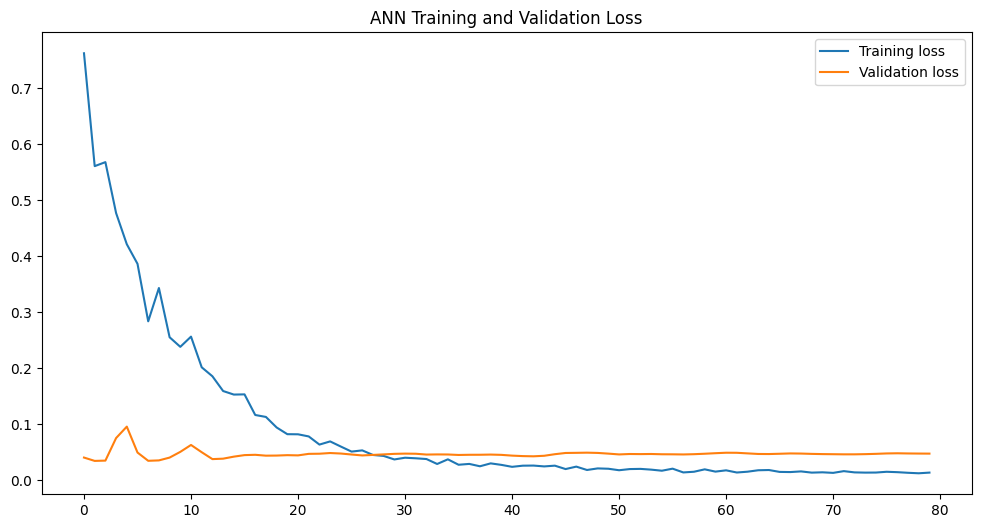

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [38]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [39]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 9.8572
RMSE: 3.1396
MAE: 1.8842
MAPE: 228.77%
R²: -0.0375


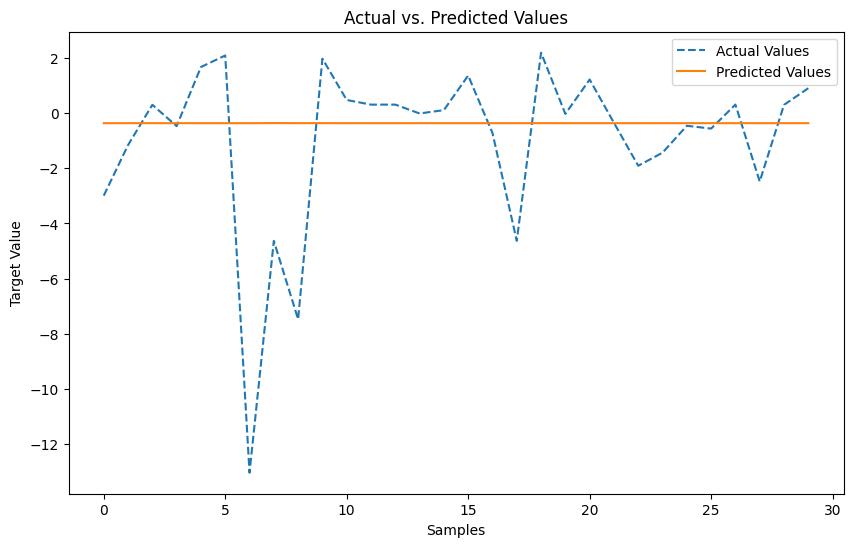

In [40]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 2

In [41]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [42]:

df=data.copy()
df = df.astype(float)


In [43]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [44]:
# Number of lags to create
lags = 2
lagged_features = create_lagged_features(df, lags)


In [45]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [46]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-10-31       0.008275                  NaN                  NaN
2000-11-30      -0.305147             0.008275                  NaN
2000-12-31       3.588124            -0.305147             0.008275
2001-01-31       4.862272             3.588124            -0.305147
2001-02-28      -1.912424             4.862272             3.588124
...                   ...                  ...                  ...
2024-11-30      -0.563288            -0.461114            -1.436900
2024-12-31       0.307545            -0.563288            -0.461114
2025-01-31      -2.480250             0.307545            -0.563288
2025-02-28       0.297586            -2.480250             0.307545
2025-03-31       0.899539             0.297586            -2.480250

[294 rows x 3 columns]


In [47]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2'], dtype='object')


In [48]:
df2=lagged_features.dropna()

In [49]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-12-31       3.588124            -0.305147             0.008275
2001-01-31       4.862272             3.588124            -0.305147
2001-02-28      -1.912424             4.862272             3.588124
2001-03-31      -4.553144            -1.912424             4.862272
2001-04-30       1.766259            -4.553144            -1.912424
...                   ...                  ...                  ...
2024-11-30      -0.563288            -0.461114            -1.436900
2024-12-31       0.307545            -0.563288            -0.461114
2025-01-31      -2.480250             0.307545            -0.563288
2025-02-28       0.297586            -2.480250             0.307545
2025-03-31       0.899539             0.297586            -2.480250

[292 rows x 3 columns]


292

In [50]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
dtype: int64

In [51]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-12-31       3.588124            -0.305147             0.008275
2001-01-31       4.862272             3.588124            -0.305147
2001-02-28      -1.912424             4.862272             3.588124
2001-03-31      -4.553144            -1.912424             4.862272
2001-04-30       1.766259            -4.553144            -1.912424
...                   ...                  ...                  ...
2024-11-30      -0.563288            -0.461114            -1.436900
2024-12-31       0.307545            -0.563288            -0.461114
2025-01-31      -2.480250             0.307545            -0.563288
2025-02-28       0.297586            -2.480250             0.307545
2025-03-31       0.899539             0.297586            -2.480250

[292 rows x 3 columns]

In [53]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [54]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-12-31       3.588124            -0.305147             0.008275
2001-01-31       4.862272             3.588124            -0.305147
2001-02-28      -1.912424             4.862272             3.588124
2001-03-31      -4.553144            -1.912424             4.862272
2001-04-30       1.766259            -4.553144            -1.912424
...                   ...                  ...                  ...
2022-05-31       5.615758             9.835432             3.163297
2022-06-30      11.736290             5.615758             9.835432
2022-07-31       0.011420            11.736290             5.615758
2022-08-31       1.562259             0.011420            11.736290
2022-09-30       4.302073             1.562259             0.011420

[262 rows x 3 columns]

In [55]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [56]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-12-31       3.588124            -0.305147             0.008275
2001-01-31       4.862272             3.588124            -0.305147
2001-02-28      -1.912424             4.862272             3.588124
2001-03-31      -4.553144            -1.912424             4.862272
2001-04-30       1.766259            -4.553144            -1.912424
...                   ...                  ...                  ...
2022-05-31       5.615758             9.835432             3.163297
2022-06-30      11.736290             5.615758             9.835432
2022-07-31       0.011420            11.736290             5.615758
2022-08-31       1.562259             0.011420            11.736290
2022-09-30       4.302073             1.562259             0.011420

[262 rows x 3 columns]

In [57]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-10-31    -2.994717
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2'], dtype='object')

In [60]:
ytrain

Date
2000-12-31     3.588124
2001-01-31     4.862272
2001-02-28    -1.912424
2001-03-31    -4.553144
2001-04-30     1.766259
                ...    
2022-05-31     5.615758
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
Name: Residuals_SVR, Length: 262, dtype: float64

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [62]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [63]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                
2000-12-31            -0.305147             0.008275
2001-01-31             3.588124            -0.305147
2001-02-28             4.862272             3.588124
2001-03-31            -1.912424             4.862272
2001-04-30            -4.553144            -1.912424
...                         ...                  ...
2022-05-31             9.835432             3.163297
2022-06-30             5.615758             9.835432
2022-07-31            11.736290             5.615758
2022-08-31             0.011420            11.736290
2022-09-30             1.562259             0.011420

[262 rows x 2 columns]

In [64]:
df1=pd.DataFrame(ytrain)

In [65]:
X_train_scaled

array([[0.26078235, 0.28002317],
       [0.49978827, 0.26078235],
       [0.57800757, 0.49978827],
       [0.16211246, 0.57800757],
       [0.        , 0.16211246],
       [0.38794492, 0.        ],
       [0.45578505, 0.38794492],
       [0.15981909, 0.45578505],
       [0.26106888, 0.15981909],
       [0.21637214, 0.26106888],
       [0.52287011, 0.21637214],
       [0.13383955, 0.52287011],
       [0.3911197 , 0.13383955],
       [0.00504757, 0.3911197 ],
       [0.25923566, 0.00504757],
       [0.29854922, 0.25923566],
       [0.51887598, 0.29854922],
       [0.04199675, 0.51887598],
       [0.42603605, 0.04199675],
       [0.27704006, 0.42603605],
       [0.26158229, 0.27704006],
       [0.21708934, 0.26158229],
       [0.1726411 , 0.21708934],
       [0.39920846, 0.1726411 ],
       [0.29331057, 0.39920846],
       [0.44224208, 0.29331057],
       [0.34302778, 0.44224208],
       [0.05714548, 0.34302778],
       [0.12593844, 0.05714548],
       [0.37578395, 0.12593844],
       [0.

In [66]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [67]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                
2000-12-31             0.260782             0.280023
2001-01-31             0.499788             0.260782
2001-02-28             0.578008             0.499788
2001-03-31             0.162112             0.578008
2001-04-30             0.000000             0.162112
...                         ...                  ...
2022-05-31             0.883307             0.473708
2022-06-30             0.624264             0.883307
2022-07-31             1.000000             0.624264
2022-08-31             0.280216             1.000000
2022-09-30             0.375421             0.280216

[262 rows x 2 columns]

In [68]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [69]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                               
2000-12-31       3.588124             0.260782             0.280023
2001-01-31       4.862272             0.499788             0.260782
2001-02-28      -1.912424             0.578008             0.499788
2001-03-31      -4.553144             0.162112             0.578008
2001-04-30       1.766259             0.000000             0.162112
...                   ...                  ...                  ...
2022-05-31       5.615758             0.883307             0.473708
2022-06-30      11.736290             0.624264             0.883307
2022-07-31       0.011420             1.000000             0.624264
2022-08-31       1.562259             0.280216             1.000000
2022-09-30       4.302073             0.375421             0.280216

[262 rows x 3 columns]

In [70]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2
Date                                                
2000-12-31             0.260782             0.280023
2001-01-31             0.499788             0.260782
2001-02-28             0.578008             0.499788
2001-03-31             0.162112             0.578008
2001-04-30             0.000000             0.162112
...                         ...                  ...
2022-05-31             0.883307             0.473708
2022-06-30             0.624264             0.883307
2022-07-31             1.000000             0.624264
2022-08-31             0.280216             1.000000
2022-09-30             0.375421             0.280216

[262 rows x 2 columns]

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 15:38:36,476] A new study created in memory with name: no-name-04566afb-fd49-416b-88e7-c9188da264ed
[I 2025-05-15 15:39:02,800] Trial 0 finished with value: 0.010353208426386118 and parameters: {'input_units': 128, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.08219773543072828, 'optimizer': 'Adam', 'batch_size': 64, 'epochs': 80}. Best is trial 0 with value: 0.010353208426386118.
[I 2025-05-15 15:39:09,996] Trial 1 finished with value: 0.010075913043692708 and parameters: {'input_units': 48, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 80, 'dropout_rate_0': 0.05186088903418773, 'n_units_1': 80, 'dropout_rate_1': 0.26786088421238013, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 20}. Best is trial 1 with value: 0.010075913043692708.
[I 2025-05-15 15:39:37,716] Trial 2 finished with value: 0.011024164594709873 and parameters: {'input_units': 64, 'activation': 'tanh', 'num_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.2617944069601

Best hyperparameters:  {'input_units': 128, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 48, 'dropout_rate_0': 0.38417439156146116, 'n_units_1': 48, 'dropout_rate_1': 0.0734954000195106, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 40}


Best hyperparameters:  {'input_units': 48, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 32, 'dropout_rate_0': 0.17002752103955923, 'n_units_1': 128, 'dropout_rate_1': 0.34985530992621416, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 100}

Best hyperparameters:  {'input_units': 128, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 48, 'dropout_rate_0': 0.38417439156146116, 'n_units_1': 48, 'dropout_rate_1': 0.0734954000195106, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 40}
Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0879 - mae: 0.2650 - val_loss: 0.0254 - val_mae: 0.0974
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0247 - mae: 0.1243 - val_loss: 0.0391 - val_mae: 0.1615
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0308 - mae: 0.1380 - val_loss: 0.0262 - val_mae: 0.0968
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0135 - mae: 0.0920 - val_loss: 0.0473 - val_mae: 0.1522
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0180 - mae: 0.1072 - val_loss: 0.0507 - val_mae: 0.1601
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0169 - mae: 0.1063 - val_loss: 0.0346 - val_mae: 0.1144
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 

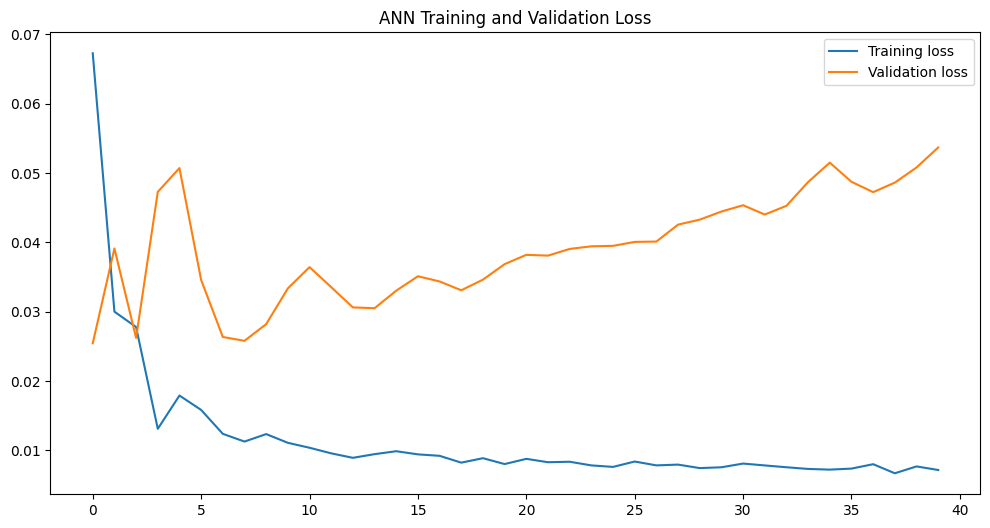

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [73]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [74]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 10.5984
RMSE: 3.2555
MAE: 1.8701
MAPE: 163.31%
R²: -0.1155


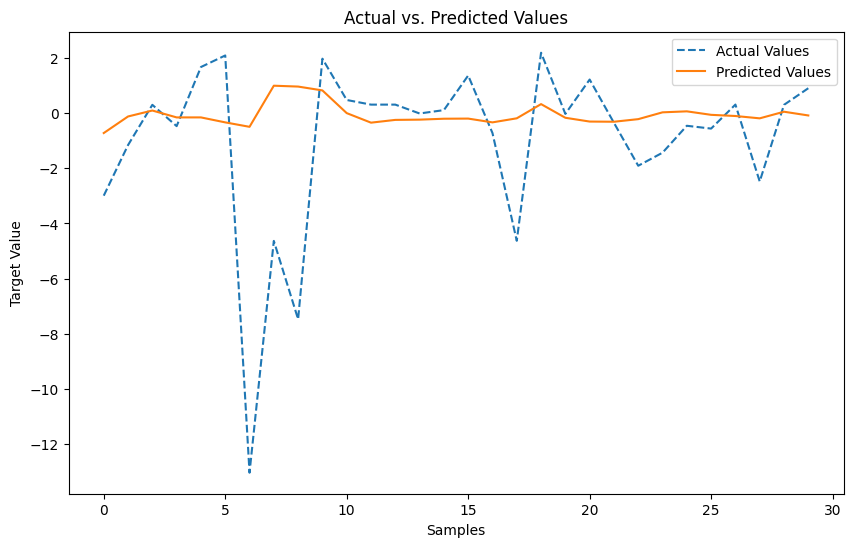

In [75]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 3

In [76]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [77]:

df=data.copy()
df = df.astype(float)


In [78]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [79]:
# Number of lags to create
lags = 3
lagged_features = create_lagged_features(df, lags)


In [80]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [81]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  
Date     

In [82]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3'],
      dtype='object')


In [83]:
df2=lagged_features.dropna()

In [84]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  
Date                             
2001-01-

291

In [85]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
dtype: int64

In [86]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  
Date                             
2001-01-31             0.008275  
2001-02-28            -0.305147  
2001-03-31             3.588124  
2001-04-30             4.862272  
2001-05-31            -1.912424  
...                         ...  
2024-11-30            -1.909754  
2024-12-31            -1.436900  
2025-01-31            -0.461114  
2025-02-28            -0.563288  
2025-03-31             0.307545  

[291 rows x 4 columns]

In [88]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [89]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
...                   ...                  ...                  ...   
2022-05-31       5.615758             9.835432             3.163297   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   

            Residuals_SVR_lag_3  
Date                             
2001-01-31             0.008275  
2001-02-28            -0.305147  
2001-03-31             3.588124  
2001-04-30             4.862272  
2001-05-31            -1.912424  
...                         ...  
2022-05-31            -0.015115  
2022-06-30             3.163297  
2022-07-31             9.835432  
2022-08-31             5.615758  
2022-09-30            11.736290  

[261 rows x 4 columns]

In [90]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [91]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
...                   ...                  ...                  ...   
2022-05-31       5.615758             9.835432             3.163297   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   

            Residuals_SVR_lag_3  
Date                             
2001-01-31             0.008275  
2001-02-28            -0.305147  
2001-03-31             3.588124  
2001-04-30             4.862272  
2001-05-31            -1.912424  
...                         ...  
2022-05-31            -0.015115  
2022-06-30             3.163297  
2022-07-31             9.835432  
2022-08-31             5.615758  
2022-09-30            11.736290  

[261 rows x 4 columns]

In [92]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-10-31    -2.994717
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3'], dtype='object')

In [95]:
ytrain

Date
2001-01-31     4.862272
2001-02-28    -1.912424
2001-03-31    -4.553144
2001-04-30     1.766259
2001-05-31     2.871336
                ...    
2022-05-31     5.615758
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
Name: Residuals_SVR, Length: 261, dtype: float64

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [97]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [98]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3
Date                                                                     
2001-01-31             3.588124            -0.305147             0.008275
2001-02-28             4.862272             3.588124            -0.305147
2001-03-31            -1.912424             4.862272             3.588124
2001-04-30            -4.553144            -1.912424             4.862272
2001-05-31             1.766259            -4.553144            -1.912424
...                         ...                  ...                  ...
2022-05-31             9.835432             3.163297            -0.015115
2022-06-30             5.615758             9.835432             3.163297
2022-07-31            11.736290             5.615758             9.835432
2022-08-31             0.011420            11.736290             5.615758
2022-09-30             1.562259             0.011420            11.736290

[261 rows x 3 columns]

In [99]:
df1=pd.DataFrame(ytrain)

In [100]:
X_train_scaled

array([[0.49978827, 0.26078235, 0.28002317],
       [0.57800757, 0.49978827, 0.26078235],
       [0.16211246, 0.57800757, 0.49978827],
       [0.        , 0.16211246, 0.57800757],
       [0.38794492, 0.        , 0.16211246],
       [0.45578505, 0.38794492, 0.        ],
       [0.15981909, 0.45578505, 0.38794492],
       [0.26106888, 0.15981909, 0.45578505],
       [0.21637214, 0.26106888, 0.15981909],
       [0.52287011, 0.21637214, 0.26106888],
       [0.13383955, 0.52287011, 0.21637214],
       [0.3911197 , 0.13383955, 0.52287011],
       [0.00504757, 0.3911197 , 0.13383955],
       [0.25923566, 0.00504757, 0.3911197 ],
       [0.29854922, 0.25923566, 0.00504757],
       [0.51887598, 0.29854922, 0.25923566],
       [0.04199675, 0.51887598, 0.29854922],
       [0.42603605, 0.04199675, 0.51887598],
       [0.27704006, 0.42603605, 0.04199675],
       [0.26158229, 0.27704006, 0.42603605],
       [0.21708934, 0.26158229, 0.27704006],
       [0.1726411 , 0.21708934, 0.26158229],
       [0.

In [101]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [102]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3
Date                                                                     
2001-01-31             0.499788             0.260782             0.280023
2001-02-28             0.578008             0.499788             0.260782
2001-03-31             0.162112             0.578008             0.499788
2001-04-30             0.000000             0.162112             0.578008
2001-05-31             0.387945             0.000000             0.162112
...                         ...                  ...                  ...
2022-05-31             0.883307             0.473708             0.278587
2022-06-30             0.624264             0.883307             0.473708
2022-07-31             1.000000             0.624264             0.883307
2022-08-31             0.280216             1.000000             0.624264
2022-09-30             0.375421             0.280216             1.000000

[261 rows x 3 columns]

In [103]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [104]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-01-31       4.862272             0.499788             0.260782   
2001-02-28      -1.912424             0.578008             0.499788   
2001-03-31      -4.553144             0.162112             0.578008   
2001-04-30       1.766259             0.000000             0.162112   
2001-05-31       2.871336             0.387945             0.000000   
...                   ...                  ...                  ...   
2022-05-31       5.615758             0.883307             0.473708   
2022-06-30      11.736290             0.624264             0.883307   
2022-07-31       0.011420             1.000000             0.624264   
2022-08-31       1.562259             0.280216             1.000000   
2022-09-30       4.302073             0.375421             0.280216   

            Residuals_SVR_lag_3  
Date                             
2001-01-31             0.280023  
2001-02-28             0.260782  
2001-03-31             0.499788  
2001-04-30             0.578008  
2001-05-31             0.162112  
...                         ...  
2022-05-31             0.278587  
2022-06-30             0.473708  
2022-07-31             0.883307  
2022-08-31             0.624264  
2022-09-30             1.000000  

[261 rows x 4 columns]

In [105]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3
Date                                                                     
2001-01-31             0.499788             0.260782             0.280023
2001-02-28             0.578008             0.499788             0.260782
2001-03-31             0.162112             0.578008             0.499788
2001-04-30             0.000000             0.162112             0.578008
2001-05-31             0.387945             0.000000             0.162112
...                         ...                  ...                  ...
2022-05-31             0.883307             0.473708             0.278587
2022-06-30             0.624264             0.883307             0.473708
2022-07-31             1.000000             0.624264             0.883307
2022-08-31             0.280216             1.000000             0.624264
2022-09-30             0.375421             0.280216             1.000000

[261 rows x 3 columns]

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 15:51:51,879] A new study created in memory with name: no-name-70b18c4f-cbf5-4272-bd44-92b1897711e6
[I 2025-05-15 15:52:22,544] Trial 0 finished with value: 0.010486636497080325 and parameters: {'input_units': 96, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 48, 'dropout_rate_0': 0.06588354856981615, 'optimizer': 'RMSprop', 'batch_size': 16, 'epochs': 70}. Best is trial 0 with value: 0.010486636497080325.
[I 2025-05-15 15:52:26,495] Trial 1 finished with value: 0.01158145722001791 and parameters: {'input_units': 128, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.1924688203124239, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 10}. Best is trial 0 with value: 0.010486636497080325.
[I 2025-05-15 15:52:51,126] Trial 2 finished with value: 0.012455949559807777 and parameters: {'input_units': 64, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.24629645562710573, 'optimizer': 'Adam', 'batch_size': 16, 'epochs'

Best hyperparameters:  {'input_units': 80, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.0012781535188911405, 'n_units_1': 112, 'dropout_rate_1': 0.26506307100315685, 'optimizer': 'Adam', 'batch_size': 64, 'epochs': 10}


Best hyperparameters:  {'input_units': 32, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.45842415177096446, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 40}

Best hyperparameters:  {'input_units': 80, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.0012781535188911405, 'n_units_1': 112, 'dropout_rate_1': 0.26506307100315685, 'optimizer': 'Adam', 'batch_size': 64, 'epochs': 10}
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0659 - mae: 0.2441 - val_loss: 0.0781 - val_mae: 0.2212
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0215 - mae: 0.1284 - val_loss: 0.0320 - val_mae: 0.1078
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0101 - mae: 0.0738 - val_loss: 0.0296 - val_mae: 0.1146
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0163 - mae: 0.1010 - val_loss: 0.0279 - val_mae: 0.1040
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0106 - mae: 0.0752 - val_loss: 0.0294 - val_mae: 0.1002
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mae: 0.0728 - val_loss: 0.0346 - val_mae: 0.1166
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

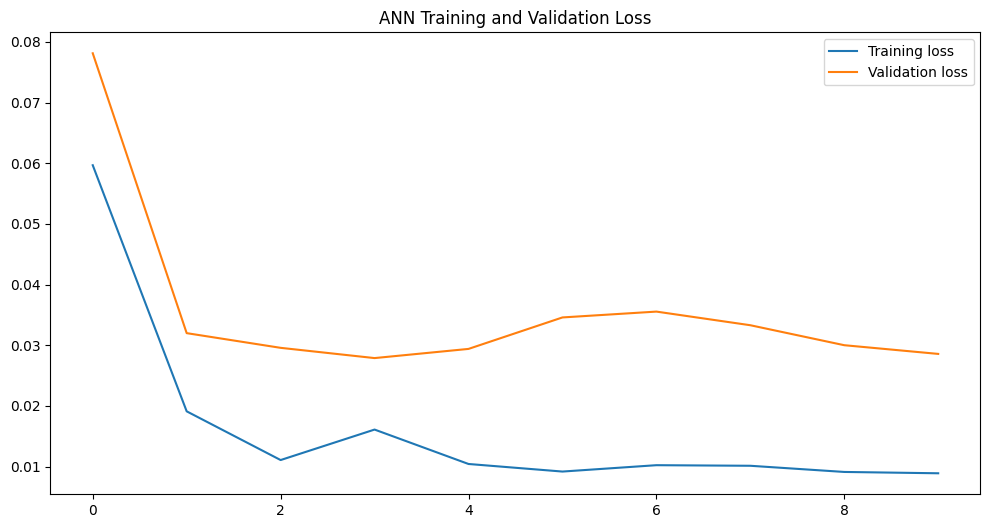

In [107]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [108]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [109]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 12.7884
RMSE: 3.5761
MAE: 2.1704
MAPE: 230.62%
R²: -0.3460


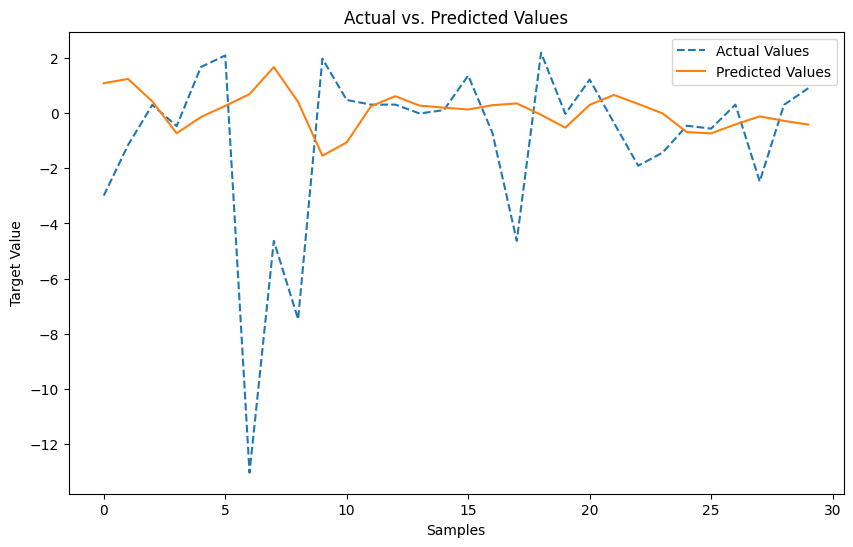

In [110]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 4

In [111]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [112]:

df=data.copy()
df = df.astype(float)


In [113]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [114]:
# Number of lags to create
lags = 4
lagged_features = create_lagged_features(df, lags)


In [115]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [116]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [117]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4'],
      dtype='object')


In [118]:
df2=lagged_features.dropna()

In [119]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  
Date                 

290

In [120]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
dtype: int64

In [121]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [122]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  
Date                                                  
2001-02-28            -0.305147             0.008275  
2001-03-31             3.588124            -0.305147  
2001-04-30             4.862272             3.588124  
2001-05-31            -1.912424             4.862272  
2001-06-30            -4.553144            -1.912424  
...                         ...                  ...  
2024-11-30            -1.909754            -0.353615  
2024-12-31            -1.436900            -1.909754  
2025-01-31            -0.461114            -1.436900  
2025-02-28            -0.563288            -0.461114  
2025-03-31             0.307545            -0.563288  

[290 rows x 5 columns]

In [123]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [124]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  
Date                                                  
2001-02-28            -0.305147             0.008275  
2001-03-31             3.588124            -0.305147  
2001-04-30             4.862272             3.588124  
2001-05-31            -1.912424             4.862272  
2001-06-30            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30             3.163297            -0.015115  
2022-07-31             9.835432             3.163297  
2022-08-31             5.615758             9.835432  
2022-09-30            11.736290             5.615758  
2022-10-31             0.011420            11.736290  

[261 rows x 5 columns]

In [125]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [126]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-02-28      -1.912424             4.862272             3.588124   
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  
Date                                                  
2001-02-28            -0.305147             0.008275  
2001-03-31             3.588124            -0.305147  
2001-04-30             4.862272             3.588124  
2001-05-31            -1.912424             4.862272  
2001-06-30            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30             3.163297            -0.015115  
2022-07-31             9.835432             3.163297  
2022-08-31             5.615758             9.835432  
2022-09-30            11.736290             5.615758  
2022-10-31             0.011420            11.736290  

[261 rows x 5 columns]

In [127]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4'],
      dtype='object')

In [130]:
ytrain

Date
2001-02-28    -1.912424
2001-03-31    -4.553144
2001-04-30     1.766259
2001-05-31     2.871336
2001-06-30    -1.949782
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 261, dtype: float64

In [131]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [132]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [133]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-02-28             4.862272             3.588124            -0.305147   
2001-03-31            -1.912424             4.862272             3.588124   
2001-04-30            -4.553144            -1.912424             4.862272   
2001-05-31             1.766259            -4.553144            -1.912424   
2001-06-30             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  
Date                             
2001-02-28             0.008275  
2001-03-31            -0.305147  
2001-04-30             3.588124  
2001-05-31             4.862272  
2001-06-30            -1.912424  
...                         ...  
2022-06-30            -0.015115  
2022-07-31             3.163297  
2022-08-31             9.835432  
2022-09-30             5.615758  
2022-10-31            11.736290  

[261 rows x 4 columns]

In [134]:
df1=pd.DataFrame(ytrain)

In [135]:
X_train_scaled

array([[0.57800757, 0.49978827, 0.26078235, 0.28002317],
       [0.16211246, 0.57800757, 0.49978827, 0.26078235],
       [0.        , 0.16211246, 0.57800757, 0.49978827],
       ...,
       [0.28021626, 1.        , 0.62426369, 0.88330731],
       [0.37542144, 0.28021626, 1.        , 0.62426369],
       [0.54361726, 0.37542144, 0.28021626, 1.        ]])

In [136]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [137]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-02-28             0.578008             0.499788             0.260782   
2001-03-31             0.162112             0.578008             0.499788   
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  
Date                             
2001-02-28             0.280023  
2001-03-31             0.260782  
2001-04-30             0.499788  
2001-05-31             0.578008  
2001-06-30             0.162112  
...                         ...  
2022-06-30             0.278587  
2022-07-31             0.473708  
2022-08-31             0.883307  
2022-09-30             0.624264  
2022-10-31             1.000000  

[261 rows x 4 columns]

In [138]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [139]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-02-28      -1.912424             0.578008             0.499788   
2001-03-31      -4.553144             0.162112             0.578008   
2001-04-30       1.766259             0.000000             0.162112   
2001-05-31       2.871336             0.387945             0.000000   
2001-06-30      -1.949782             0.455785             0.387945   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.624264             0.883307   
2022-07-31       0.011420             1.000000             0.624264   
2022-08-31       1.562259             0.280216             1.000000   
2022-09-30       4.302073             0.375421             0.280216   
2022-10-31      -2.994717             0.543617             0.375421   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  
Date                                                  
2001-02-28             0.260782             0.280023  
2001-03-31             0.499788             0.260782  
2001-04-30             0.578008             0.499788  
2001-05-31             0.162112             0.578008  
2001-06-30             0.000000             0.162112  
...                         ...                  ...  
2022-06-30             0.473708             0.278587  
2022-07-31             0.883307             0.473708  
2022-08-31             0.624264             0.883307  
2022-09-30             1.000000             0.624264  
2022-10-31             0.280216             1.000000  

[261 rows x 5 columns]

In [140]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-02-28             0.578008             0.499788             0.260782   
2001-03-31             0.162112             0.578008             0.499788   
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  
Date                             
2001-02-28             0.280023  
2001-03-31             0.260782  
2001-04-30             0.499788  
2001-05-31             0.578008  
2001-06-30             0.162112  
...                         ...  
2022-06-30             0.278587  
2022-07-31             0.473708  
2022-08-31             0.883307  
2022-09-30             0.624264  
2022-10-31             1.000000  

[261 rows x 4 columns]

In [141]:
###########

In [142]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 16:10:48,046] A new study created in memory with name: no-name-a4e8cfe7-7416-4090-b988-73cd2085767a
[I 2025-05-15 16:10:54,328] Trial 0 finished with value: 0.013491990137845277 and parameters: {'input_units': 16, 'activation': 'sigmoid', 'num_layers': 3, 'n_units_0': 112, 'dropout_rate_0': 0.4815540690763299, 'n_units_1': 48, 'dropout_rate_1': 0.2784101983902027, 'n_units_2': 80, 'dropout_rate_2': 0.3779401016752413, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 10}. Best is trial 0 with value: 0.013491990137845277.
[I 2025-05-15 16:11:14,994] Trial 1 finished with value: 0.012328589614480735 and parameters: {'input_units': 96, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 16, 'dropout_rate_0': 0.04064683092325011, 'n_units_1': 80, 'dropout_rate_1': 0.4096382086770575, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 70}. Best is trial 1 with value: 0.012328589614480735.
[I 2025-05-15 16:11:18,839] Trial 2 finished with value: 0.025427802000194788 and paramet

Best hyperparameters:  {'input_units': 64, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.08926551705205685, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 70}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 64, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.08926551705205685, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 70}
Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1405 - mae: 0.3651 - val_loss: 0.1883 - val_mae: 0.3853
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0754 - mae: 0.2623 - val_loss: 0.1058 - val_mae: 0.2631
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0319 - mae: 0.1656 - val_loss: 0.0582 - val_mae: 0.1647
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0123 - mae: 0.0908 - val_loss: 0.0396 - val_mae: 0.1157
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0080 - mae: 0.0680 - val_loss: 0.0398 - val_mae: 0.1351
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0124 - mae: 0.0873 - val_loss: 0.0409 - val_mae: 0.1402
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134 - mae: 0.0888 - val_loss: 0.0390 - val_mae: 0.1290
Epoch

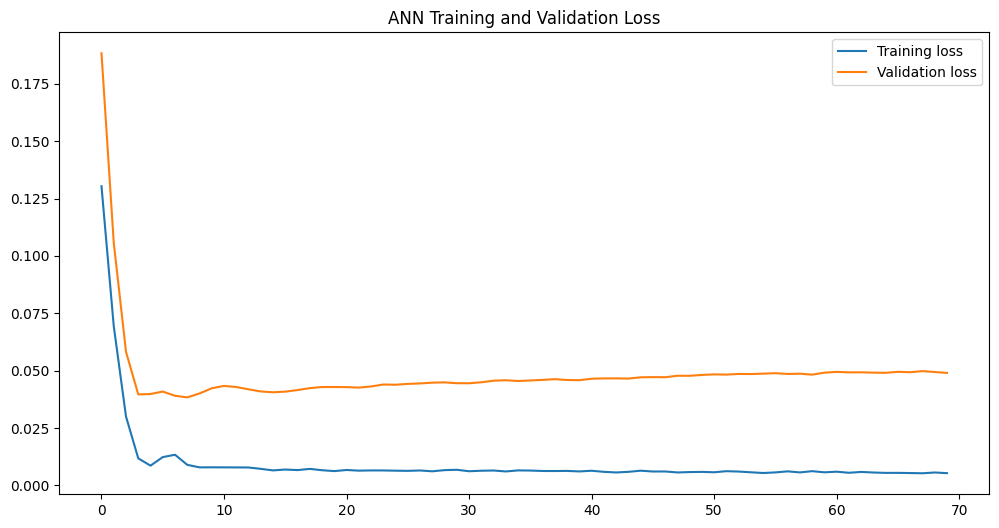

In [143]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [144]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [145]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 14.1894
RMSE: 3.7669
MAE: 2.3943
MAPE: 358.12%
R²: -0.4657


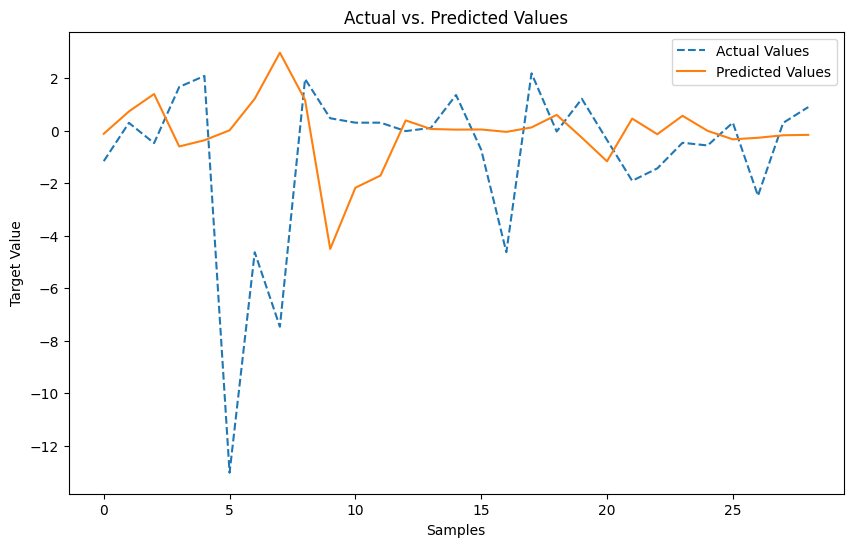

In [146]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 5

In [147]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [148]:

df=data.copy()
df = df.astype(float)


In [149]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [150]:
# Number of lags to create
lags = 5
lagged_features = create_lagged_features(df, lags)


In [151]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [152]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [153]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5'],
      dtype='object')


In [154]:
df2=lagged_features.dropna()

In [155]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  


289

In [156]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
Residuals_SVR_lag_5    0
dtype: int64

In [157]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [158]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                                       
2001-03-31             3.588124            -0.305147             0.008275  
2001-04-30             4.862272             3.588124            -0.305147  
2001-05-31            -1.912424             4.862272             3.588124  
2001-06-30            -4.553144            -1.912424             4.862272  
2001-07-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2024-11-30            -1.909754            -0.353615             1.214286  
2024-12-31            -1.436900            -1.909754            -0.353615  
2025-01-31            -0.461114            -1.436900            -1.909754  
2025-02-28            -0.563288            -0.461114            -1.436900  
2025-03-31             0.307545            -0.563288            -0.461114  

[289 rows x 6 columns]

In [159]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [160]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                                       
2001-03-31             3.588124            -0.305147             0.008275  
2001-04-30             4.862272             3.588124            -0.305147  
2001-05-31            -1.912424             4.862272             3.588124  
2001-06-30            -4.553144            -1.912424             4.862272  
2001-07-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30             3.163297            -0.015115             0.950832  
2022-07-31             9.835432             3.163297            -0.015115  
2022-08-31             5.615758             9.835432             3.163297  
2022-09-30            11.736290             5.615758             9.835432  
2022-10-31             0.011420            11.736290             5.615758  

[260 rows x 6 columns]

In [161]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [162]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-03-31      -4.553144            -1.912424             4.862272   
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                                       
2001-03-31             3.588124            -0.305147             0.008275  
2001-04-30             4.862272             3.588124            -0.305147  
2001-05-31            -1.912424             4.862272             3.588124  
2001-06-30            -4.553144            -1.912424             4.862272  
2001-07-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30             3.163297            -0.015115             0.950832  
2022-07-31             9.835432             3.163297            -0.015115  
2022-08-31             5.615758             9.835432             3.163297  
2022-09-30            11.736290             5.615758             9.835432  
2022-10-31             0.011420            11.736290             5.615758  

[260 rows x 6 columns]

In [163]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5'],
      dtype='object')

In [166]:
ytrain

Date
2001-03-31    -4.553144
2001-04-30     1.766259
2001-05-31     2.871336
2001-06-30    -1.949782
2001-07-31    -0.300480
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 260, dtype: float64

In [167]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [168]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [169]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-03-31            -1.912424             4.862272             3.588124   
2001-04-30            -4.553144            -1.912424             4.862272   
2001-05-31             1.766259            -4.553144            -1.912424   
2001-06-30             2.871336             1.766259            -4.553144   
2001-07-31            -1.949782             2.871336             1.766259   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                  
2001-03-31            -0.305147             0.008275  
2001-04-30             3.588124            -0.305147  
2001-05-31             4.862272             3.588124  
2001-06-30            -1.912424             4.862272  
2001-07-31            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30            -0.015115             0.950832  
2022-07-31             3.163297            -0.015115  
2022-08-31             9.835432             3.163297  
2022-09-30             5.615758             9.835432  
2022-10-31            11.736290             5.615758  

[260 rows x 5 columns]

In [170]:
df1=pd.DataFrame(ytrain)

In [171]:
X_train_scaled

array([[0.16211246, 0.57800757, 0.49978827, 0.26078235, 0.3170167 ],
       [0.        , 0.16211246, 0.57800757, 0.49978827, 0.295234  ],
       [0.38794492, 0.        , 0.16211246, 0.57800757, 0.56581471],
       ...,
       [0.28021626, 1.        , 0.62426369, 0.88330731, 0.53628944],
       [0.37542144, 0.28021626, 1.        , 0.62426369, 1.        ],
       [0.54361726, 0.37542144, 0.28021626, 1.        , 0.70673443]])

In [172]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [173]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-03-31             0.162112             0.578008             0.499788   
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
2001-07-31             0.159819             0.455785             0.387945   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                  
2001-03-31             0.260782             0.317017  
2001-04-30             0.499788             0.295234  
2001-05-31             0.578008             0.565815  
2001-06-30             0.162112             0.654367  
2001-07-31             0.000000             0.183529  
...                         ...                  ...  
2022-06-30             0.278587             0.382524  
2022-07-31             0.473708             0.315391  
2022-08-31             0.883307             0.536289  
2022-09-30             0.624264             1.000000  
2022-10-31             1.000000             0.706734  

[260 rows x 5 columns]

In [174]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [175]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-03-31      -4.553144             0.162112             0.578008   
2001-04-30       1.766259             0.000000             0.162112   
2001-05-31       2.871336             0.387945             0.000000   
2001-06-30      -1.949782             0.455785             0.387945   
2001-07-31      -0.300480             0.159819             0.455785   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.624264             0.883307   
2022-07-31       0.011420             1.000000             0.624264   
2022-08-31       1.562259             0.280216             1.000000   
2022-09-30       4.302073             0.375421             0.280216   
2022-10-31      -2.994717             0.543617             0.375421   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                                       
2001-03-31             0.499788             0.260782             0.317017  
2001-04-30             0.578008             0.499788             0.295234  
2001-05-31             0.162112             0.578008             0.565815  
2001-06-30             0.000000             0.162112             0.654367  
2001-07-31             0.387945             0.000000             0.183529  
...                         ...                  ...                  ...  
2022-06-30             0.473708             0.278587             0.382524  
2022-07-31             0.883307             0.473708             0.315391  
2022-08-31             0.624264             0.883307             0.536289  
2022-09-30             1.000000             0.624264             1.000000  
2022-10-31             0.280216             1.000000             0.706734  

[260 rows x 6 columns]

In [176]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-03-31             0.162112             0.578008             0.499788   
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
2001-07-31             0.159819             0.455785             0.387945   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  
Date                                                  
2001-03-31             0.260782             0.317017  
2001-04-30             0.499788             0.295234  
2001-05-31             0.578008             0.565815  
2001-06-30             0.162112             0.654367  
2001-07-31             0.000000             0.183529  
...                         ...                  ...  
2022-06-30             0.278587             0.382524  
2022-07-31             0.473708             0.315391  
2022-08-31             0.883307             0.536289  
2022-09-30             0.624264             1.000000  
2022-10-31             1.000000             0.706734  

[260 rows x 5 columns]

In [177]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 16:27:34,481] A new study created in memory with name: no-name-898a9ea9-2561-448e-ae16-36b05a2c7994
[I 2025-05-15 16:27:57,942] Trial 0 finished with value: 0.012358929589390754 and parameters: {'input_units': 80, 'activation': 'relu', 'num_layers': 3, 'n_units_0': 96, 'dropout_rate_0': 0.004060136456221497, 'n_units_1': 80, 'dropout_rate_1': 0.019880000606591397, 'n_units_2': 16, 'dropout_rate_2': 0.3213516983614698, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 80}. Best is trial 0 with value: 0.012358929589390754.
[I 2025-05-15 16:28:28,122] Trial 1 finished with value: 0.011717990320175887 and parameters: {'input_units': 32, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 48, 'dropout_rate_0': 0.007400158756302344, 'optimizer': 'RMSprop', 'batch_size': 16, 'epochs': 90}. Best is trial 1 with value: 0.011717990320175887.
[I 2025-05-15 16:28:46,342] Trial 2 finished with value: 0.01024855962023139 and parameters: {'input_units': 48, 'activation': 'sigmoid',

Best hyperparameters:  {'input_units': 64, 'activation': 'relu', 'num_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.37670353615341234, 'n_units_1': 32, 'dropout_rate_1': 0.4665820241973336, 'n_units_2': 64, 'dropout_rate_2': 0.3769721543209687, 'optimizer': 'SGD', 'batch_size': 16, 'epochs': 50}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 64, 'activation': 'relu', 'num_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.37670353615341234, 'n_units_1': 32, 'dropout_rate_1': 0.4665820241973336, 'n_units_2': 64, 'dropout_rate_2': 0.3769721543209687, 'optimizer': 'SGD', 'batch_size': 16, 'epochs': 50}
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0519 - mae: 0.2002 - val_loss: 0.0392 - val_mae: 0.1196
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0193 - mae: 0.1084 - val_loss: 0.0523 - val_mae: 0.1545
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0149 - mae: 0.0992 - val_loss: 0.0460 - val_mae: 0.1333
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0103 - mae: 0.0777 - val_loss: 0.0490 - val_mae: 0.1392
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mae: 0.0760 - val_loss: 0.0502 - val_mae: 0.1383
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mae: 0.0768 - val_loss: 0.0486 - val_mae: 0.1293


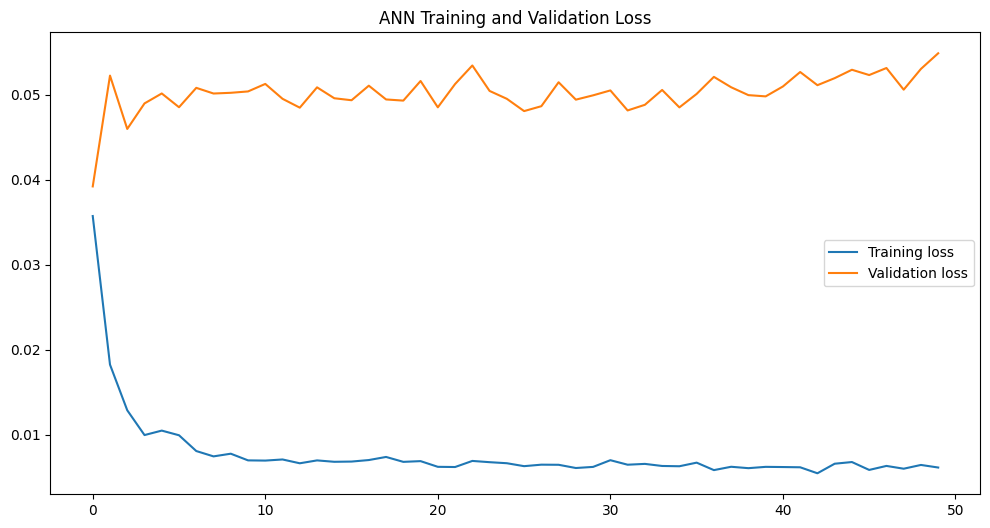

In [178]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [179]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [180]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 14.1219
RMSE: 3.7579
MAE: 2.2195
MAPE: 252.95%
R²: -0.4587


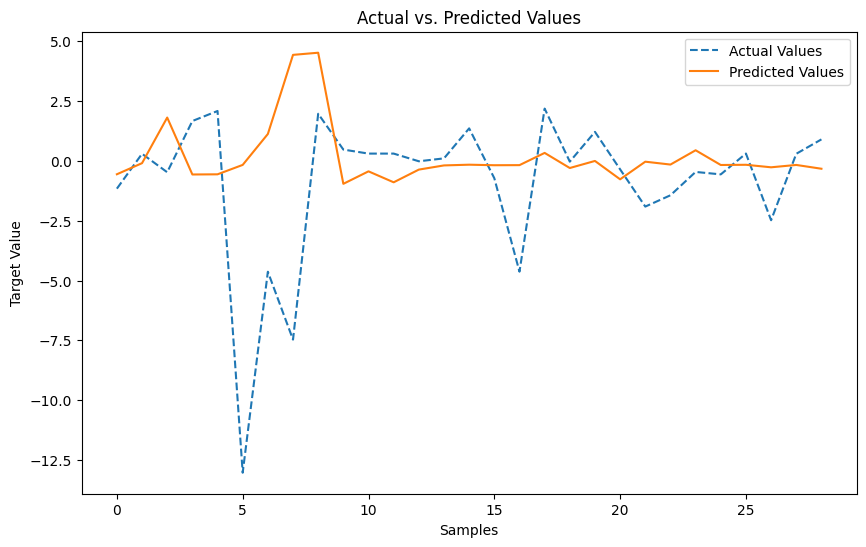

In [181]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 6

In [182]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [183]:

df=data.copy()
df = df.astype(float)


In [184]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [185]:
# Number of lags to create
lags = 6
lagged_features = create_lagged_features(df, lags)


In [186]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [187]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [188]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5',
       'Residuals_SVR_lag_6'],
      dtype='object')


In [189]:
df2=lagged_features.dropna()

In [190]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \

288

In [191]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
Residuals_SVR_lag_5    0
Residuals_SVR_lag_6    0
dtype: int64

In [192]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [193]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-04-30             4.862272             3.588124            -0.305147   
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2024-11-30            -1.909754            -0.353615             1.214286   
2024-12-31            -1.436900            -1.909754            -0.353615   
2025-01-31            -0.461114            -1.436900            -1.909754   
2025-02-28            -0.563288            -0.461114            -1.436900   
2025-03-31             0.307545            -0.563288            -0.461114   

            Residuals_SVR_lag_6  
Date                             
2001-04-30             0.008275  
2001-05-31            -0.305147  
2001-06-30             3.588124  
2001-07-31             4.862272  
2001-08-31            -1.912424  
...                         ...  
2024-11-30            -0.030812  
2024-12-31             1.214286  
2025-01-31            -0.353615  
2025-02-28            -1.909754  
2025-03-31            -1.436900  

[288 rows x 7 columns]

In [194]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [195]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-04-30             4.862272             3.588124            -0.305147   
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  
Date                             
2001-04-30             0.008275  
2001-05-31            -0.305147  
2001-06-30             3.588124  
2001-07-31             4.862272  
2001-08-31            -1.912424  
...                         ...  
2022-06-30             1.316352  
2022-07-31             0.950832  
2022-08-31            -0.015115  
2022-09-30             3.163297  
2022-10-31             9.835432  

[259 rows x 7 columns]

In [196]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [197]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-04-30       1.766259            -4.553144            -1.912424   
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-04-30             4.862272             3.588124            -0.305147   
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  
Date                             
2001-04-30             0.008275  
2001-05-31            -0.305147  
2001-06-30             3.588124  
2001-07-31             4.862272  
2001-08-31            -1.912424  
...                         ...  
2022-06-30             1.316352  
2022-07-31             0.950832  
2022-08-31            -0.015115  
2022-09-30             3.163297  
2022-10-31             9.835432  

[259 rows x 7 columns]

In [198]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5', 'Residuals_SVR_lag_6'],
      dtype='object')

In [201]:
ytrain

Date
2001-04-30     1.766259
2001-05-31     2.871336
2001-06-30    -1.949782
2001-07-31    -0.300480
2001-08-31    -1.028564
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 259, dtype: float64

In [202]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [203]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [204]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-04-30            -4.553144            -1.912424             4.862272   
2001-05-31             1.766259            -4.553144            -1.912424   
2001-06-30             2.871336             1.766259            -4.553144   
2001-07-31            -1.949782             2.871336             1.766259   
2001-08-31            -0.300480            -1.949782             2.871336   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  
Date                                                                       
2001-04-30             3.588124            -0.305147             0.008275  
2001-05-31             4.862272             3.588124            -0.305147  
2001-06-30            -1.912424             4.862272             3.588124  
2001-07-31            -4.553144            -1.912424             4.862272  
2001-08-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30            -0.015115             0.950832             1.316352  
2022-07-31             3.163297            -0.015115             0.950832  
2022-08-31             9.835432             3.163297            -0.015115  
2022-09-30             5.615758             9.835432             3.163297  
2022-10-31            11.736290             5.615758             9.835432  

[259 rows x 6 columns]

In [205]:
df1=pd.DataFrame(ytrain)

In [206]:
X_train_scaled

array([[0.        , 0.16211246, 0.57800757, 0.49978827, 0.295234  ,
        0.3170167 ],
       [0.38794492, 0.        , 0.16211246, 0.57800757, 0.56581471,
        0.295234  ],
       [0.45578505, 0.38794492, 0.        , 0.16211246, 0.65436747,
        0.56581471],
       ...,
       [0.28021626, 1.        , 0.62426369, 0.88330731, 0.53628944,
        0.31539113],
       [0.37542144, 0.28021626, 1.        , 0.62426369, 1.        ,
        0.53628944],
       [0.54361726, 0.37542144, 0.28021626, 1.        , 0.70673443,
        1.        ]])

In [207]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [208]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
2001-07-31             0.159819             0.455785             0.387945   
2001-08-31             0.261069             0.159819             0.455785   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  
Date                                                                       
2001-04-30             0.499788             0.295234             0.317017  
2001-05-31             0.578008             0.565815             0.295234  
2001-06-30             0.162112             0.654367             0.565815  
2001-07-31             0.000000             0.183529             0.654367  
2001-08-31             0.387945             0.000000             0.183529  
...                         ...                  ...                  ...  
2022-06-30             0.278587             0.382524             0.407927  
2022-07-31             0.473708             0.315391             0.382524  
2022-08-31             0.883307             0.536289             0.315391  
2022-09-30             0.624264             1.000000             0.536289  
2022-10-31             1.000000             0.706734             1.000000  

[259 rows x 6 columns]

In [209]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [210]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-04-30       1.766259             0.000000             0.162112   
2001-05-31       2.871336             0.387945             0.000000   
2001-06-30      -1.949782             0.455785             0.387945   
2001-07-31      -0.300480             0.159819             0.455785   
2001-08-31      -1.028564             0.261069             0.159819   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.624264             0.883307   
2022-07-31       0.011420             1.000000             0.624264   
2022-08-31       1.562259             0.280216             1.000000   
2022-09-30       4.302073             0.375421             0.280216   
2022-10-31      -2.994717             0.543617             0.375421   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-04-30             0.578008             0.499788             0.295234   
2001-05-31             0.162112             0.578008             0.565815   
2001-06-30             0.000000             0.162112             0.654367   
2001-07-31             0.387945             0.000000             0.183529   
2001-08-31             0.455785             0.387945             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.473708             0.278587             0.382524   
2022-07-31             0.883307             0.473708             0.315391   
2022-08-31             0.624264             0.883307             0.536289   
2022-09-30             1.000000             0.624264             1.000000   
2022-10-31             0.280216             1.000000             0.706734   

            Residuals_SVR_lag_6  
Date                             
2001-04-30             0.317017  
2001-05-31             0.295234  
2001-06-30             0.565815  
2001-07-31             0.654367  
2001-08-31             0.183529  
...                         ...  
2022-06-30             0.407927  
2022-07-31             0.382524  
2022-08-31             0.315391  
2022-09-30             0.536289  
2022-10-31             1.000000  

[259 rows x 7 columns]

In [211]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-04-30             0.000000             0.162112             0.578008   
2001-05-31             0.387945             0.000000             0.162112   
2001-06-30             0.455785             0.387945             0.000000   
2001-07-31             0.159819             0.455785             0.387945   
2001-08-31             0.261069             0.159819             0.455785   
...                         ...                  ...                  ...   
2022-06-30             0.624264             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.280216             1.000000             0.624264   
2022-09-30             0.375421             0.280216             1.000000   
2022-10-31             0.543617             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  
Date                                                                       
2001-04-30             0.499788             0.295234             0.317017  
2001-05-31             0.578008             0.565815             0.295234  
2001-06-30             0.162112             0.654367             0.565815  
2001-07-31             0.000000             0.183529             0.654367  
2001-08-31             0.387945             0.000000             0.183529  
...                         ...                  ...                  ...  
2022-06-30             0.278587             0.382524             0.407927  
2022-07-31             0.473708             0.315391             0.382524  
2022-08-31             0.883307             0.536289             0.315391  
2022-09-30             0.624264             1.000000             0.536289  
2022-10-31             1.000000             0.706734             1.000000  

[259 rows x 6 columns]

In [212]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 16:42:10,585] A new study created in memory with name: no-name-f98a5fac-cef2-4cda-a758-be46ff9bbfa9
[I 2025-05-15 16:42:20,532] Trial 0 finished with value: 0.009279377106577159 and parameters: {'input_units': 128, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 48, 'dropout_rate_0': 0.4526361515560492, 'n_units_1': 128, 'dropout_rate_1': 0.440996742231476, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 30}. Best is trial 0 with value: 0.009279377106577159.
[I 2025-05-15 16:42:41,139] Trial 1 finished with value: 0.010287251975387334 and parameters: {'input_units': 128, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 48, 'dropout_rate_0': 0.21684375483942742, 'optimizer': 'SGD', 'batch_size': 48, 'epochs': 70}. Best is trial 0 with value: 0.009279377106577159.
[I 2025-05-15 16:43:05,322] Trial 2 finished with value: 0.013646982703357935 and parameters: {'input_units': 32, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.071622416359187

Best hyperparameters:  {'input_units': 80, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.35802816275792626, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 50}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 80, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.35802816275792626, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 50}
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0497 - mae: 0.1971 - val_loss: 0.0404 - val_mae: 0.1193
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0122 - mae: 0.0826 - val_loss: 0.0412 - val_mae: 0.1280
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0109 - mae: 0.0832 - val_loss: 0.0407 - val_mae: 0.1208
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114 - mae: 0.0786 - val_loss: 0.0436 - val_mae: 0.1328
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - mae: 0.0794 - val_loss: 0.0405 - val_mae: 0.1217
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099 - mae: 0.0795 - val_loss: 0.0395 - val_mae: 0.1199
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mae: 0.0770 - val_loss: 0.0411 - val_mae: 0.1215
Epoch

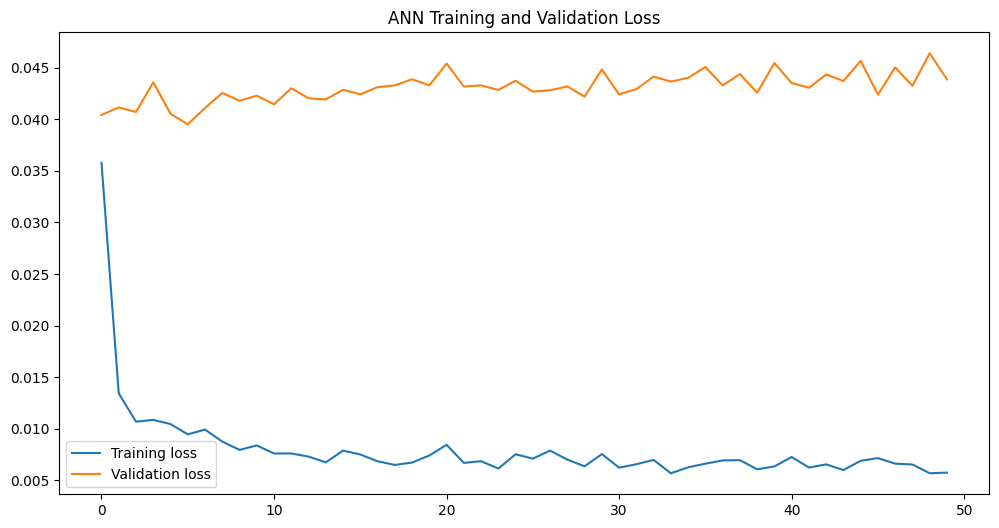

In [213]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [214]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [215]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 13.3640
RMSE: 3.6557
MAE: 2.2372
MAPE: 250.77%
R²: -0.3804


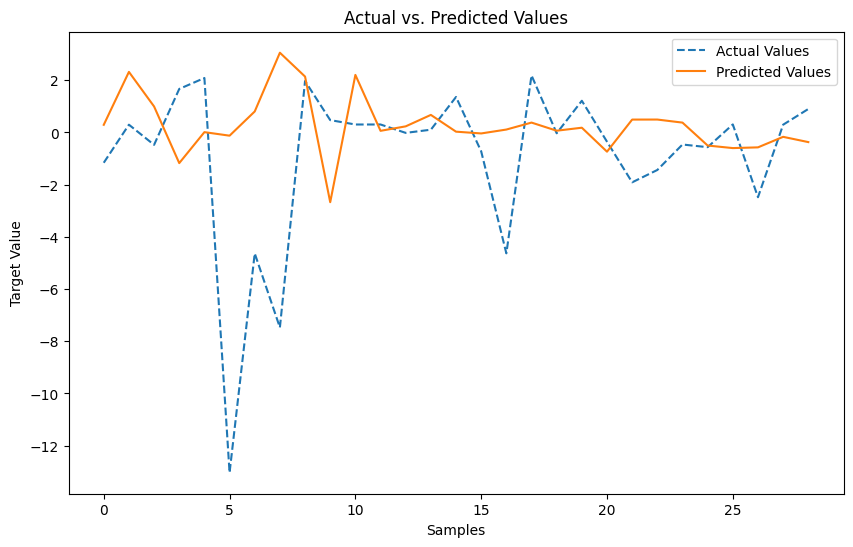

In [216]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 7

In [217]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [218]:

df=data.copy()
df = df.astype(float)


In [219]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [220]:
# Number of lags to create
lags = 7
lagged_features = create_lagged_features(df, lags)


In [221]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [222]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [223]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5',
       'Residuals_SVR_lag_6', 'Residuals_SVR_lag_7'],
      dtype='object')


In [224]:
df2=lagged_features.dropna()

In [225]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \

287

In [226]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
Residuals_SVR_lag_5    0
Residuals_SVR_lag_6    0
Residuals_SVR_lag_7    0
dtype: int64

In [227]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [228]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
...                         ...                  ...                  ...   
2024-11-30            -1.909754            -0.353615             1.214286   
2024-12-31            -1.436900            -1.909754            -0.353615   
2025-01-31            -0.461114            -1.436900            -1.909754   
2025-02-28            -0.563288            -0.461114            -1.436900   
2025-03-31             0.307545            -0.563288            -0.461114   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  
Date                                                  
2001-05-31            -0.305147             0.008275  
2001-06-30             3.588124            -0.305147  
2001-07-31             4.862272             3.588124  
2001-08-31            -1.912424             4.862272  
2001-09-30            -4.553144            -1.912424  
...                         ...                  ...  
2024-11-30            -0.030812             2.186347  
2024-12-31             1.214286            -0.030812  
2025-01-31            -0.353615             1.214286  
2025-02-28            -1.909754            -0.353615  
2025-03-31            -1.436900            -1.909754  

[287 rows x 8 columns]

In [229]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [230]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  
Date                                                  
2001-05-31            -0.305147             0.008275  
2001-06-30             3.588124            -0.305147  
2001-07-31             4.862272             3.588124  
2001-08-31            -1.912424             4.862272  
2001-09-30            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30             1.316352             1.393301  
2022-07-31             0.950832             1.316352  
2022-08-31            -0.015115             0.950832  
2022-09-30             3.163297            -0.015115  
2022-10-31             9.835432             3.163297  

[258 rows x 8 columns]

In [231]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [232]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-05-31       2.871336             1.766259            -4.553144   
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-05-31            -1.912424             4.862272             3.588124   
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  
Date                                                  
2001-05-31            -0.305147             0.008275  
2001-06-30             3.588124            -0.305147  
2001-07-31             4.862272             3.588124  
2001-08-31            -1.912424             4.862272  
2001-09-30            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30             1.316352             1.393301  
2022-07-31             0.950832             1.316352  
2022-08-31            -0.015115             0.950832  
2022-09-30             3.163297            -0.015115  
2022-10-31             9.835432             3.163297  

[258 rows x 8 columns]

In [233]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [234]:
from sklearn.preprocessing import MinMaxScaler

In [235]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5', 'Residuals_SVR_lag_6',
       'Residuals_SVR_lag_7'],
      dtype='object')

In [236]:
ytrain

Date
2001-05-31     2.871336
2001-06-30    -1.949782
2001-07-31    -0.300480
2001-08-31    -1.028564
2001-09-30     3.964114
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 258, dtype: float64

In [237]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [238]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [239]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-05-31             1.766259            -4.553144            -1.912424   
2001-06-30             2.871336             1.766259            -4.553144   
2001-07-31            -1.949782             2.871336             1.766259   
2001-08-31            -0.300480            -1.949782             2.871336   
2001-09-30            -1.028564            -0.300480            -1.949782   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-05-31             4.862272             3.588124            -0.305147   
2001-06-30            -1.912424             4.862272             3.588124   
2001-07-31            -4.553144            -1.912424             4.862272   
2001-08-31             1.766259            -4.553144            -1.912424   
2001-09-30             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30            -0.015115             0.950832             1.316352   
2022-07-31             3.163297            -0.015115             0.950832   
2022-08-31             9.835432             3.163297            -0.015115   
2022-09-30             5.615758             9.835432             3.163297   
2022-10-31            11.736290             5.615758             9.835432   

            Residuals_SVR_lag_7  
Date                             
2001-05-31             0.008275  
2001-06-30            -0.305147  
2001-07-31             3.588124  
2001-08-31             4.862272  
2001-09-30            -1.912424  
...                         ...  
2022-06-30             1.393301  
2022-07-31             1.316352  
2022-08-31             0.950832  
2022-09-30            -0.015115  
2022-10-31             3.163297  

[258 rows x 7 columns]

In [240]:
df1=pd.DataFrame(ytrain)

In [241]:
X_train_scaled

array([[0.38483985, 0.        , 0.16211246, ..., 0.56581471, 0.295234  ,
        0.4844628 ],
       [0.45302415, 0.38794492, 0.        , ..., 0.65436747, 0.56581471,
        0.45117463],
       [0.1555567 , 0.45578505, 0.38794492, ..., 0.18352895, 0.65436747,
        0.86467427],
       ...,
       [0.27656467, 1.        , 0.62426369, ..., 0.53628944, 0.31539113,
        0.58457065],
       [0.37225284, 0.28021626, 1.        , ..., 1.        , 0.53628944,
        0.48197861],
       [0.54130195, 0.37542144, 0.28021626, ..., 0.70673443, 1.        ,
        0.81955393]])

In [242]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [243]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-05-31             0.384840             0.000000             0.162112   
2001-06-30             0.453024             0.387945             0.000000   
2001-07-31             0.155557             0.455785             0.387945   
2001-08-31             0.257320             0.159819             0.455785   
2001-09-30             0.212397             0.261069             0.159819   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.276565             1.000000             0.624264   
2022-09-30             0.372253             0.280216             1.000000   
2022-10-31             0.541302             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-05-31             0.578008             0.565815             0.295234   
2001-06-30             0.162112             0.654367             0.565815   
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  
Date                             
2001-05-31             0.484463  
2001-06-30             0.451175  
2001-07-31             0.864674  
2001-08-31             1.000000  
2001-09-30             0.280468  
...                         ...  
2022-06-30             0.631565  
2022-07-31             0.623392  
2022-08-31             0.584571  
2022-09-30             0.481979  
2022-10-31             0.819554  

[258 rows x 7 columns]

In [244]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [245]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-05-31       2.871336             0.384840             0.000000   
2001-06-30      -1.949782             0.453024             0.387945   
2001-07-31      -0.300480             0.155557             0.455785   
2001-08-31      -1.028564             0.257320             0.159819   
2001-09-30       3.964114             0.212397             0.261069   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.622358             0.883307   
2022-07-31       0.011420             1.000000             0.624264   
2022-08-31       1.562259             0.276565             1.000000   
2022-09-30       4.302073             0.372253             0.280216   
2022-10-31      -2.994717             0.541302             0.375421   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-05-31             0.162112             0.578008             0.565815   
2001-06-30             0.000000             0.162112             0.654367   
2001-07-31             0.387945             0.000000             0.183529   
2001-08-31             0.455785             0.387945             0.000000   
2001-09-30             0.159819             0.455785             0.439196   
...                         ...                  ...                  ...   
2022-06-30             0.473708             0.278587             0.382524   
2022-07-31             0.883307             0.473708             0.315391   
2022-08-31             0.624264             0.883307             0.536289   
2022-09-30             1.000000             0.624264             1.000000   
2022-10-31             0.280216             1.000000             0.706734   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  
Date                                                  
2001-05-31             0.295234             0.484463  
2001-06-30             0.565815             0.451175  
2001-07-31             0.654367             0.864674  
2001-08-31             0.183529             1.000000  
2001-09-30             0.000000             0.280468  
...                         ...                  ...  
2022-06-30             0.407927             0.631565  
2022-07-31             0.382524             0.623392  
2022-08-31             0.315391             0.584571  
2022-09-30             0.536289             0.481979  
2022-10-31             1.000000             0.819554  

[258 rows x 8 columns]

In [246]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-05-31             0.384840             0.000000             0.162112   
2001-06-30             0.453024             0.387945             0.000000   
2001-07-31             0.155557             0.455785             0.387945   
2001-08-31             0.257320             0.159819             0.455785   
2001-09-30             0.212397             0.261069             0.159819   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.883307             0.473708   
2022-07-31             1.000000             0.624264             0.883307   
2022-08-31             0.276565             1.000000             0.624264   
2022-09-30             0.372253             0.280216             1.000000   
2022-10-31             0.541302             0.375421             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-05-31             0.578008             0.565815             0.295234   
2001-06-30             0.162112             0.654367             0.565815   
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  
Date                             
2001-05-31             0.484463  
2001-06-30             0.451175  
2001-07-31             0.864674  
2001-08-31             1.000000  
2001-09-30             0.280468  
...                         ...  
2022-06-30             0.631565  
2022-07-31             0.623392  
2022-08-31             0.584571  
2022-09-30             0.481979  
2022-10-31             0.819554  

[258 rows x 7 columns]

In [247]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 16:56:16,646] A new study created in memory with name: no-name-55794b56-1683-46b1-9e1b-20cc6740cea3
[I 2025-05-15 16:56:25,273] Trial 0 finished with value: 0.010312931425869466 and parameters: {'input_units': 128, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 16, 'dropout_rate_0': 0.4787410454702059, 'n_units_1': 32, 'dropout_rate_1': 0.27267883622204153, 'optimizer': 'RMSprop', 'batch_size': 16, 'epochs': 20}. Best is trial 0 with value: 0.010312931425869466.
[I 2025-05-15 16:56:29,093] Trial 1 finished with value: 0.009707016218453646 and parameters: {'input_units': 80, 'activation': 'sigmoid', 'num_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.010936126397471935, 'n_units_1': 64, 'dropout_rate_1': 0.40162543788270144, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 10}. Best is trial 1 with value: 0.009707016218453646.
[I 2025-05-15 16:56:56,944] Trial 2 finished with value: 0.012962113367393613 and parameters: {'input_units': 112, 'activation': 'sigmoid', '

Best hyperparameters:  {'input_units': 32, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.21336876895872542, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 50}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 32, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.21336876895872542, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 50}
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0883 - mae: 0.2776 - val_loss: 0.0976 - val_mae: 0.2483
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0259 - mae: 0.1382 - val_loss: 0.0484 - val_mae: 0.1321
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - mae: 0.0816 - val_loss: 0.0417 - val_mae: 0.1265
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0157 - mae: 0.0949 - val_loss: 0.0432 - val_mae: 0.1366
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0176 - mae: 0.1045 - val_loss: 0.0414 - val_mae: 0.1209
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0106 - mae: 0.0825 - val_loss: 0.0427 - val_mae: 0.1123
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0097 - mae: 0.0769 - val_loss: 0.0464 - val_mae: 0.1236
Epoc

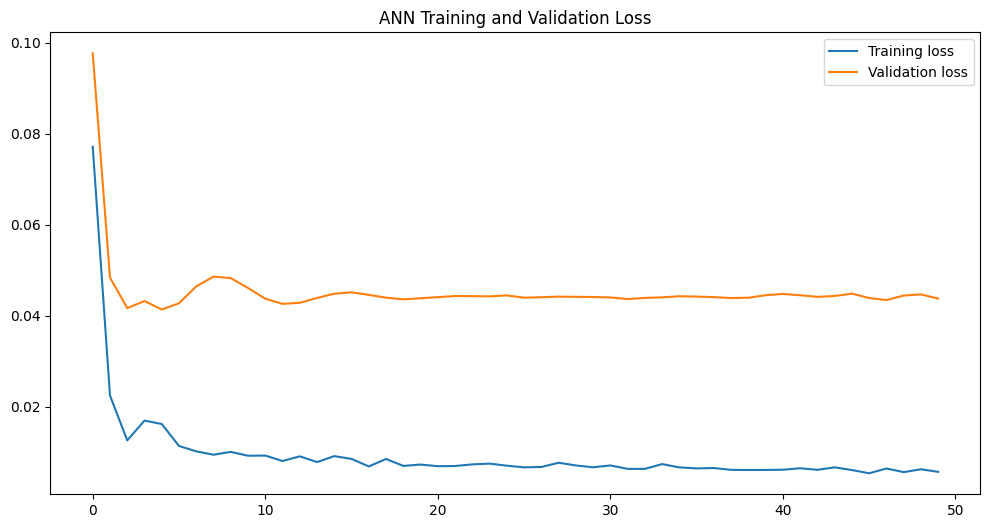

In [248]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [249]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [250]:
len(test_predictions)

29

In [251]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 13.6027
RMSE: 3.6882
MAE: 2.5386
MAPE: 375.00%
R²: -0.4051


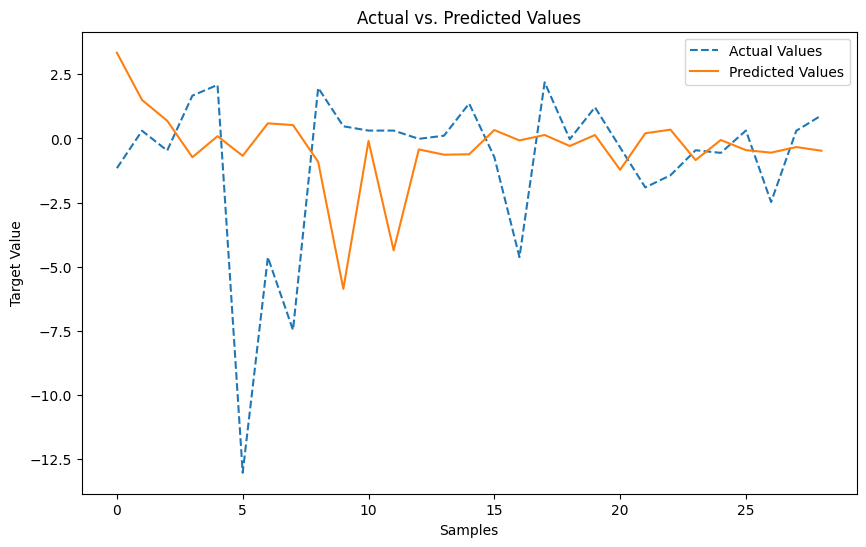

In [252]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 8

In [253]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

In [254]:

df=data.copy()
df = df.astype(float)


In [255]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [256]:
# Number of lags to create
lags = 8
lagged_features = create_lagged_features(df, lags)


In [257]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [258]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [259]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5',
       'Residuals_SVR_lag_6', 'Residuals_SVR_lag_7', 'Residuals_SVR_lag_8'],
      dtype='object')


In [260]:
df2=lagged_features.dropna()

In [261]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \

286

In [262]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
Residuals_SVR_lag_5    0
Residuals_SVR_lag_6    0
Residuals_SVR_lag_7    0
Residuals_SVR_lag_8    0
dtype: int64

In [263]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [264]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
...                         ...                  ...                  ...   
2024-11-30            -1.909754            -0.353615             1.214286   
2024-12-31            -1.436900            -1.909754            -0.353615   
2025-01-31            -0.461114            -1.436900            -1.909754   
2025-02-28            -0.563288            -0.461114            -1.436900   
2025-03-31             0.307545            -0.563288            -0.461114   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                                       
2001-06-30             3.588124            -0.305147             0.008275  
2001-07-31             4.862272             3.588124            -0.305147  
2001-08-31            -1.912424             4.862272             3.588124  
2001-09-30            -4.553144            -1.912424             4.862272  
2001-10-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2024-11-30            -0.030812             2.186347            -4.630820  
2024-12-31             1.214286            -0.030812             2.186347  
2025-01-31            -0.353615             1.214286            -0.030812  
2025-02-28            -1.909754            -0.353615             1.214286  
2025-03-31            -1.436900            -1.909754            -0.353615  

[286 rows x 9 columns]

In [265]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [266]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                                       
2001-06-30             3.588124            -0.305147             0.008275  
2001-07-31             4.862272             3.588124            -0.305147  
2001-08-31            -1.912424             4.862272             3.588124  
2001-09-30            -4.553144            -1.912424             4.862272  
2001-10-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30             1.316352             1.393301             1.874006  
2022-07-31             0.950832             1.316352             1.393301  
2022-08-31            -0.015115             0.950832             1.316352  
2022-09-30             3.163297            -0.015115             0.950832  
2022-10-31             9.835432             3.163297            -0.015115  

[257 rows x 9 columns]

In [267]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [268]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-06-30      -1.949782             2.871336             1.766259   
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-06-30            -4.553144            -1.912424             4.862272   
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                                       
2001-06-30             3.588124            -0.305147             0.008275  
2001-07-31             4.862272             3.588124            -0.305147  
2001-08-31            -1.912424             4.862272             3.588124  
2001-09-30            -4.553144            -1.912424             4.862272  
2001-10-31             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30             1.316352             1.393301             1.874006  
2022-07-31             0.950832             1.316352             1.393301  
2022-08-31            -0.015115             0.950832             1.316352  
2022-09-30             3.163297            -0.015115             0.950832  
2022-10-31             9.835432             3.163297            -0.015115  

[257 rows x 9 columns]

In [269]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5', 'Residuals_SVR_lag_6',
       'Residuals_SVR_lag_7', 'Residuals_SVR_lag_8'],
      dtype='object')

In [272]:
ytrain

Date
2001-06-30    -1.949782
2001-07-31    -0.300480
2001-08-31    -1.028564
2001-09-30     3.964114
2001-10-31    -2.372974
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 257, dtype: float64

In [273]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [274]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [275]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-06-30             2.871336             1.766259            -4.553144   
2001-07-31            -1.949782             2.871336             1.766259   
2001-08-31            -0.300480            -1.949782             2.871336   
2001-09-30            -1.028564            -0.300480            -1.949782   
2001-10-31             3.964114            -1.028564            -0.300480   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-06-30            -1.912424             4.862272             3.588124   
2001-07-31            -4.553144            -1.912424             4.862272   
2001-08-31             1.766259            -4.553144            -1.912424   
2001-09-30             2.871336             1.766259            -4.553144   
2001-10-31            -1.949782             2.871336             1.766259   
...                         ...                  ...                  ...   
2022-06-30            -0.015115             0.950832             1.316352   
2022-07-31             3.163297            -0.015115             0.950832   
2022-08-31             9.835432             3.163297            -0.015115   
2022-09-30             5.615758             9.835432             3.163297   
2022-10-31            11.736290             5.615758             9.835432   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                  
2001-06-30            -0.305147             0.008275  
2001-07-31             3.588124            -0.305147  
2001-08-31             4.862272             3.588124  
2001-09-30            -1.912424             4.862272  
2001-10-31            -4.553144            -1.912424  
...                         ...                  ...  
2022-06-30             1.393301             1.874006  
2022-07-31             1.316352             1.393301  
2022-08-31             0.950832             1.316352  
2022-09-30            -0.015115             0.950832  
2022-10-31             3.163297            -0.015115  

[257 rows x 8 columns]

In [276]:
df1=pd.DataFrame(ytrain)

In [277]:
X_train_scaled

array([[0.45302415, 0.38483985, 0.        , ..., 0.56581471, 0.45117463,
        0.4844628 ],
       [0.1555567 , 0.45302415, 0.38794492, ..., 0.65436747, 0.86467427,
        0.45117463],
       [0.25732015, 0.1555567 , 0.45578505, ..., 0.18352895, 1.        ,
        0.86467427],
       ...,
       [0.27656467, 1.        , 0.62426369, ..., 0.31539113, 0.58457065,
        0.62339207],
       [0.37225284, 0.27656467, 1.        , ..., 0.53628944, 0.48197861,
        0.58457065],
       [0.54130195, 0.37225284, 0.28021626, ..., 1.        , 0.81955393,
        0.48197861]])

In [278]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [279]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-06-30             0.453024             0.384840             0.000000   
2001-07-31             0.155557             0.453024             0.387945   
2001-08-31             0.257320             0.155557             0.455785   
2001-09-30             0.212397             0.257320             0.159819   
2001-10-31             0.520450             0.212397             0.261069   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.882715             0.473708   
2022-07-31             1.000000             0.622358             0.883307   
2022-08-31             0.276565             1.000000             0.624264   
2022-09-30             0.372253             0.276565             1.000000   
2022-10-31             0.541302             0.372253             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-06-30             0.162112             0.654367             0.565815   
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
2001-10-31             0.159819             0.515998             0.439196   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                  
2001-06-30             0.451175             0.484463  
2001-07-31             0.864674             0.451175  
2001-08-31             1.000000             0.864674  
2001-09-30             0.280468             1.000000  
2001-10-31             0.000000             0.280468  
...                         ...                  ...  
2022-06-30             0.631565             0.682620  
2022-07-31             0.623392             0.631565  
2022-08-31             0.584571             0.623392  
2022-09-30             0.481979             0.584571  
2022-10-31             0.819554             0.481979  

[257 rows x 8 columns]

In [280]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [281]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-06-30      -1.949782             0.453024             0.384840   
2001-07-31      -0.300480             0.155557             0.453024   
2001-08-31      -1.028564             0.257320             0.155557   
2001-09-30       3.964114             0.212397             0.257320   
2001-10-31      -2.372974             0.520450             0.212397   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.622358             0.882715   
2022-07-31       0.011420             1.000000             0.622358   
2022-08-31       1.562259             0.276565             1.000000   
2022-09-30       4.302073             0.372253             0.276565   
2022-10-31      -2.994717             0.541302             0.372253   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-06-30             0.000000             0.162112             0.654367   
2001-07-31             0.387945             0.000000             0.183529   
2001-08-31             0.455785             0.387945             0.000000   
2001-09-30             0.159819             0.455785             0.439196   
2001-10-31             0.261069             0.159819             0.515998   
...                         ...                  ...                  ...   
2022-06-30             0.473708             0.278587             0.382524   
2022-07-31             0.883307             0.473708             0.315391   
2022-08-31             0.624264             0.883307             0.536289   
2022-09-30             1.000000             0.624264             1.000000   
2022-10-31             0.280216             1.000000             0.706734   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                                       
2001-06-30             0.565815             0.451175             0.484463  
2001-07-31             0.654367             0.864674             0.451175  
2001-08-31             0.183529             1.000000             0.864674  
2001-09-30             0.000000             0.280468             1.000000  
2001-10-31             0.439196             0.000000             0.280468  
...                         ...                  ...                  ...  
2022-06-30             0.407927             0.631565             0.682620  
2022-07-31             0.382524             0.623392             0.631565  
2022-08-31             0.315391             0.584571             0.623392  
2022-09-30             0.536289             0.481979             0.584571  
2022-10-31             1.000000             0.819554             0.481979  

[257 rows x 9 columns]

In [282]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-06-30             0.453024             0.384840             0.000000   
2001-07-31             0.155557             0.453024             0.387945   
2001-08-31             0.257320             0.155557             0.455785   
2001-09-30             0.212397             0.257320             0.159819   
2001-10-31             0.520450             0.212397             0.261069   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.882715             0.473708   
2022-07-31             1.000000             0.622358             0.883307   
2022-08-31             0.276565             1.000000             0.624264   
2022-09-30             0.372253             0.276565             1.000000   
2022-10-31             0.541302             0.372253             0.280216   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-06-30             0.162112             0.654367             0.565815   
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
2001-10-31             0.159819             0.515998             0.439196   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  
Date                                                  
2001-06-30             0.451175             0.484463  
2001-07-31             0.864674             0.451175  
2001-08-31             1.000000             0.864674  
2001-09-30             0.280468             1.000000  
2001-10-31             0.000000             0.280468  
...                         ...                  ...  
2022-06-30             0.631565             0.682620  
2022-07-31             0.623392             0.631565  
2022-08-31             0.584571             0.623392  
2022-09-30             0.481979             0.584571  
2022-10-31             0.819554             0.481979  

[257 rows x 8 columns]

In [283]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 17:11:46,091] A new study created in memory with name: no-name-164b20b8-a597-4202-9931-2944ee0aa990
[I 2025-05-15 17:12:00,943] Trial 0 finished with value: 0.013197999820113182 and parameters: {'input_units': 128, 'activation': 'sigmoid', 'num_layers': 3, 'n_units_0': 16, 'dropout_rate_0': 0.30504556868285065, 'n_units_1': 128, 'dropout_rate_1': 0.19443151891594473, 'n_units_2': 48, 'dropout_rate_2': 0.14205328328817557, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 50}. Best is trial 0 with value: 0.013197999820113182.
[I 2025-05-15 17:12:09,692] Trial 1 finished with value: 0.009017393924295902 and parameters: {'input_units': 16, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.006814780359301276, 'n_units_1': 32, 'dropout_rate_1': 0.24482138312606133, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 30}. Best is trial 1 with value: 0.009017393924295902.
[I 2025-05-15 17:12:13,881] Trial 2 finished with value: 0.012718027085065841 and pa

Best hyperparameters:  {'input_units': 16, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.006814780359301276, 'n_units_1': 32, 'dropout_rate_1': 0.24482138312606133, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 30}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 16, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.006814780359301276, 'n_units_1': 32, 'dropout_rate_1': 0.24482138312606133, 'optimizer': 'SGD', 'batch_size': 64, 'epochs': 30}
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0626 - mae: 0.2345 - val_loss: 0.0979 - val_mae: 0.2550
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0324 - mae: 0.1579 - val_loss: 0.0593 - val_mae: 0.1775
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0174 - mae: 0.1003 - val_loss: 0.0384 - val_mae: 0.1247
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0152 - mae: 0.0946 - val_loss: 0.0310 - val_mae: 0.1013
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0172 - mae: 0.1011 - val_loss: 0.0313 - val_mae: 0.1012
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0143 - mae: 0.0941 - val_loss: 0.0345 - val_mae: 0.1095
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0124

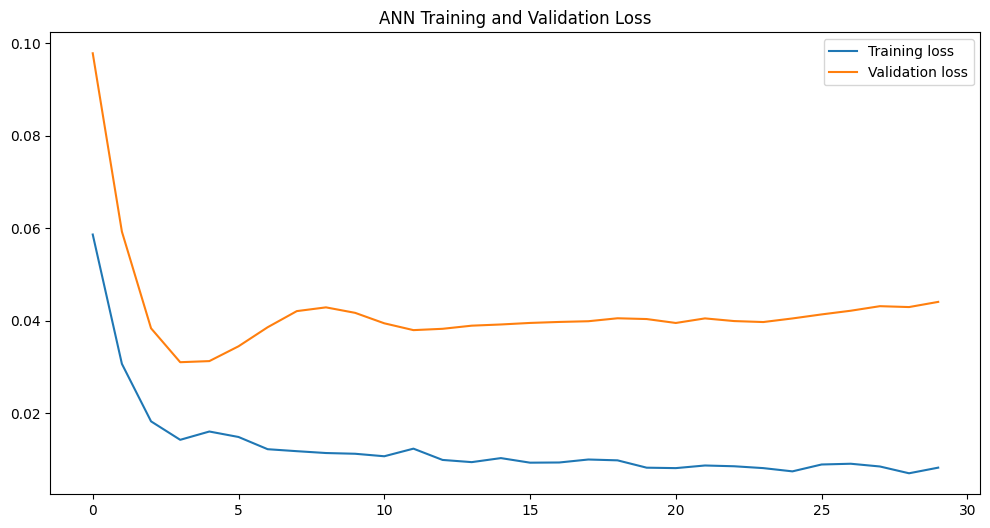

In [284]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [285]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [286]:
len(test_predictions)

29

In [287]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 12.4967
RMSE: 3.5351
MAE: 2.4511
MAPE: 874.17%
R²: -0.2908


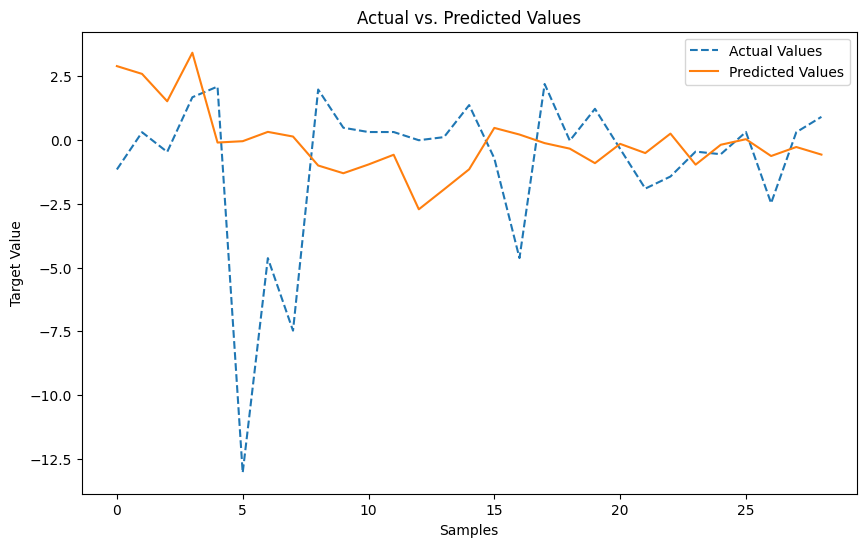

In [288]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 9

In [289]:

df=data.copy()
df = df.astype(float)


In [290]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [291]:
# Number of lags to create
lags = 9
lagged_features = create_lagged_features(df, lags)


In [292]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]


In [293]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_

In [294]:
print(lagged_features.columns)

Index(['Residuals_SVR', 'Residuals_SVR_lag_1', 'Residuals_SVR_lag_2',
       'Residuals_SVR_lag_3', 'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5',
       'Residuals_SVR_lag_6', 'Residuals_SVR_lag_7', 'Residuals_SVR_lag_8',
       'Residuals_SVR_lag_9'],
      dtype='object')


In [295]:
df2=lagged_features.dropna()

In [296]:
print(df2)
len(df2)

            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
2001-11-30       1.817974            -2.372974             3.964114   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \

285

In [297]:
df2.isnull().sum()

Residuals_SVR          0
Residuals_SVR_lag_1    0
Residuals_SVR_lag_2    0
Residuals_SVR_lag_3    0
Residuals_SVR_lag_4    0
Residuals_SVR_lag_5    0
Residuals_SVR_lag_6    0
Residuals_SVR_lag_7    0
Residuals_SVR_lag_8    0
Residuals_SVR_lag_9    0
dtype: int64

In [298]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [299]:
df2

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
2001-11-30       1.817974            -2.372974             3.964114   
...                   ...                  ...                  ...   
2024-11-30      -0.563288            -0.461114            -1.436900   
2024-12-31       0.307545            -0.563288            -0.461114   
2025-01-31      -2.480250             0.307545            -0.563288   
2025-02-28       0.297586            -2.480250             0.307545   
2025-03-31       0.899539             0.297586            -2.480250   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
2001-11-30            -1.028564            -0.300480            -1.949782   
...                         ...                  ...                  ...   
2024-11-30            -1.909754            -0.353615             1.214286   
2024-12-31            -1.436900            -1.909754            -0.353615   
2025-01-31            -0.461114            -1.436900            -1.909754   
2025-02-28            -0.563288            -0.461114            -1.436900   
2025-03-31             0.307545            -0.563288            -0.461114   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  \
Date                                                                        
2001-07-31             4.862272             3.588124            -0.305147   
2001-08-31            -1.912424             4.862272             3.588124   
2001-09-30            -4.553144            -1.912424             4.862272   
2001-10-31             1.766259            -4.553144            -1.912424   
2001-11-30             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2024-11-30            -0.030812             2.186347            -4.630820   
2024-12-31             1.214286            -0.030812             2.186347   
2025-01-31            -0.353615             1.214286            -0.030812   
2025-02-28            -1.909754            -0.353615             1.214286   
2025-03-31            -1.436900            -1.909754            -0.353615   

            Residuals_SVR_lag_9  
Date                             
2001-07-31             0.008275  
2001-08-31            -0.305147  
2001-09-30             3.588124  
2001-10-31             4.862272  
2001-11-30            -1.912424  
...                         ...  
2024-11-30            -0.724310  
2024-12-31            -4.630820  
2025-01-31             2.186347  
2025-02-28            -0.030812  
2025-03-31             1.214286  

[285 rows x 10 columns]

In [300]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [301]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
2001-11-30       1.817974            -2.372974             3.964114   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
2001-11-30            -1.028564            -0.300480            -1.949782   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  \
Date                                                                        
2001-07-31             4.862272             3.588124            -0.305147   
2001-08-31            -1.912424             4.862272             3.588124   
2001-09-30            -4.553144            -1.912424             4.862272   
2001-10-31             1.766259            -4.553144            -1.912424   
2001-11-30             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30             1.316352             1.393301             1.874006   
2022-07-31             0.950832             1.316352             1.393301   
2022-08-31            -0.015115             0.950832             1.316352   
2022-09-30             3.163297            -0.015115             0.950832   
2022-10-31             9.835432             3.163297            -0.015115   

            Residuals_SVR_lag_9  
Date                             
2001-07-31             0.008275  
2001-08-31            -0.305147  
2001-09-30             3.588124  
2001-10-31             4.862272  
2001-11-30            -1.912424  
...                         ...  
2022-06-30            -0.287124  
2022-07-31             1.874006  
2022-08-31             1.393301  
2022-09-30             1.316352  
2022-10-31             0.950832  

[256 rows x 10 columns]

In [302]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [303]:
train_data

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-07-31      -0.300480            -1.949782             2.871336   
2001-08-31      -1.028564            -0.300480            -1.949782   
2001-09-30       3.964114            -1.028564            -0.300480   
2001-10-31      -2.372974             3.964114            -1.028564   
2001-11-30       1.817974            -2.372974             3.964114   
...                   ...                  ...                  ...   
2022-06-30      11.736290             5.615758             9.835432   
2022-07-31       0.011420            11.736290             5.615758   
2022-08-31       1.562259             0.011420            11.736290   
2022-09-30       4.302073             1.562259             0.011420   
2022-10-31      -2.994717             4.302073             1.562259   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-07-31             1.766259            -4.553144            -1.912424   
2001-08-31             2.871336             1.766259            -4.553144   
2001-09-30            -1.949782             2.871336             1.766259   
2001-10-31            -0.300480            -1.949782             2.871336   
2001-11-30            -1.028564            -0.300480            -1.949782   
...                         ...                  ...                  ...   
2022-06-30             3.163297            -0.015115             0.950832   
2022-07-31             9.835432             3.163297            -0.015115   
2022-08-31             5.615758             9.835432             3.163297   
2022-09-30            11.736290             5.615758             9.835432   
2022-10-31             0.011420            11.736290             5.615758   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  \
Date                                                                        
2001-07-31             4.862272             3.588124            -0.305147   
2001-08-31            -1.912424             4.862272             3.588124   
2001-09-30            -4.553144            -1.912424             4.862272   
2001-10-31             1.766259            -4.553144            -1.912424   
2001-11-30             2.871336             1.766259            -4.553144   
...                         ...                  ...                  ...   
2022-06-30             1.316352             1.393301             1.874006   
2022-07-31             0.950832             1.316352             1.393301   
2022-08-31            -0.015115             0.950832             1.316352   
2022-09-30             3.163297            -0.015115             0.950832   
2022-10-31             9.835432             3.163297            -0.015115   

            Residuals_SVR_lag_9  
Date                             
2001-07-31             0.008275  
2001-08-31            -0.305147  
2001-09-30             3.588124  
2001-10-31             4.862272  
2001-11-30            -1.912424  
...                         ...  
2022-06-30            -0.287124  
2022-07-31             1.874006  
2022-08-31             1.393301  
2022-09-30             1.316352  
2022-10-31             0.950832  

[256 rows x 10 columns]

In [304]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-11-30    -1.160529
2022-12-31     0.298351
2023-01-31    -0.474069
2023-02-28     1.667860
2023-03-31     2.086411
2023-04-30   -13.035113
2023-05-31    -4.632998
2023-06-30    -7.471687
2023-07-31     1.970592
2023-08-31     0.473477
2023-09-30     0.305345
2023-10-31     0.305745
2023-11-30    -0.015516
2023-12-31     0.106074
2024-01-31     1.360030
2024-02-28    -0.724310
2024-03-31    -4.630820
2024-04-30     2.186347
2024-05-31    -0.030812
2024-06-30     1.214286
2024-07-31    -0.353615
2024-08-31    -1.909754
2024-09-30    -1.436900
2024-10-31    -0.461114
2024-11-30    -0.563288
2024-12-31     0.307545
2025-01-31    -2.480250
2025-02-28     0.297586
2025-03-31     0.899539
Name: Residuals_SVR, dtype: float64

In [305]:
from sklearn.preprocessing import MinMaxScaler

In [306]:
xtrain.columns

Index(['Residuals_SVR_lag_1', 'Residuals_SVR_lag_2', 'Residuals_SVR_lag_3',
       'Residuals_SVR_lag_4', 'Residuals_SVR_lag_5', 'Residuals_SVR_lag_6',
       'Residuals_SVR_lag_7', 'Residuals_SVR_lag_8', 'Residuals_SVR_lag_9'],
      dtype='object')

In [307]:
ytrain

Date
2001-07-31    -0.300480
2001-08-31    -1.028564
2001-09-30     3.964114
2001-10-31    -2.372974
2001-11-30     1.817974
                ...    
2022-06-30    11.736290
2022-07-31     0.011420
2022-08-31     1.562259
2022-09-30     4.302073
2022-10-31    -2.994717
Name: Residuals_SVR, Length: 256, dtype: float64

In [308]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [309]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [310]:
xtrain

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-07-31            -1.949782             2.871336             1.766259   
2001-08-31            -0.300480            -1.949782             2.871336   
2001-09-30            -1.028564            -0.300480            -1.949782   
2001-10-31             3.964114            -1.028564            -0.300480   
2001-11-30            -2.372974             3.964114            -1.028564   
...                         ...                  ...                  ...   
2022-06-30             5.615758             9.835432             3.163297   
2022-07-31            11.736290             5.615758             9.835432   
2022-08-31             0.011420            11.736290             5.615758   
2022-09-30             1.562259             0.011420            11.736290   
2022-10-31             4.302073             1.562259             0.011420   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-07-31            -4.553144            -1.912424             4.862272   
2001-08-31             1.766259            -4.553144            -1.912424   
2001-09-30             2.871336             1.766259            -4.553144   
2001-10-31            -1.949782             2.871336             1.766259   
2001-11-30            -0.300480            -1.949782             2.871336   
...                         ...                  ...                  ...   
2022-06-30            -0.015115             0.950832             1.316352   
2022-07-31             3.163297            -0.015115             0.950832   
2022-08-31             9.835432             3.163297            -0.015115   
2022-09-30             5.615758             9.835432             3.163297   
2022-10-31            11.736290             5.615758             9.835432   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  Residuals_SVR_lag_9  
Date                                                                       
2001-07-31             3.588124            -0.305147             0.008275  
2001-08-31             4.862272             3.588124            -0.305147  
2001-09-30            -1.912424             4.862272             3.588124  
2001-10-31            -4.553144            -1.912424             4.862272  
2001-11-30             1.766259            -4.553144            -1.912424  
...                         ...                  ...                  ...  
2022-06-30             1.393301             1.874006            -0.287124  
2022-07-31             1.316352             1.393301             1.874006  
2022-08-31             0.950832             1.316352             1.393301  
2022-09-30            -0.015115             0.950832             1.316352  
2022-10-31             3.163297            -0.015115             0.950832  

[256 rows x 9 columns]

In [311]:
df1=pd.DataFrame(ytrain)

In [312]:
X_train_scaled

array([[0.1555567 , 0.45302415, 0.38483985, ..., 0.86467427, 0.45117463,
        0.4844628 ],
       [0.25732015, 0.1555567 , 0.45302415, ..., 1.        , 0.86467427,
        0.45117463],
       [0.21239666, 0.25732015, 0.1555567 , ..., 0.28046771, 1.        ,
        0.86467427],
       ...,
       [0.27656467, 1.        , 0.62235751, ..., 0.58457065, 0.62339207,
        0.63156481],
       [0.37225284, 0.27656467, 1.        , ..., 0.48197861, 0.58457065,
        0.62339207],
       [0.54130195, 0.37225284, 0.27656467, ..., 0.81955393, 0.48197861,
        0.58457065]])

In [313]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [314]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-07-31             0.155557             0.453024             0.384840   
2001-08-31             0.257320             0.155557             0.453024   
2001-09-30             0.212397             0.257320             0.155557   
2001-10-31             0.520450             0.212397             0.257320   
2001-11-30             0.129445             0.520450             0.212397   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.882715             0.471038   
2022-07-31             1.000000             0.622358             0.882715   
2022-08-31             0.276565             1.000000             0.622358   
2022-09-30             0.372253             0.276565             1.000000   
2022-10-31             0.541302             0.372253             0.276565   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
2001-10-31             0.159819             0.515998             0.439196   
2001-11-30             0.261069             0.180933             0.515998   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  Residuals_SVR_lag_9  
Date                                                                       
2001-07-31             0.864674             0.451175             0.484463  
2001-08-31             1.000000             0.864674             0.451175  
2001-09-30             0.280468             1.000000             0.864674  
2001-10-31             0.000000             0.280468             1.000000  
2001-11-30             0.671176             0.000000             0.280468  
...                         ...                  ...                  ...  
2022-06-30             0.631565             0.682620             0.453089  
2022-07-31             0.623392             0.631565             0.682620  
2022-08-31             0.584571             0.623392             0.631565  
2022-09-30             0.481979             0.584571             0.623392  
2022-10-31             0.819554             0.481979             0.584571  

[256 rows x 9 columns]

In [315]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [316]:
df3

Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2001-07-31      -0.300480             0.155557             0.453024   
2001-08-31      -1.028564             0.257320             0.155557   
2001-09-30       3.964114             0.212397             0.257320   
2001-10-31      -2.372974             0.520450             0.212397   
2001-11-30       1.817974             0.129445             0.520450   
...                   ...                  ...                  ...   
2022-06-30      11.736290             0.622358             0.882715   
2022-07-31       0.011420             1.000000             0.622358   
2022-08-31       1.562259             0.276565             1.000000   
2022-09-30       4.302073             0.372253             0.276565   
2022-10-31      -2.994717             0.541302             0.372253   

            Residuals_SVR_lag_3  Residuals_SVR_lag_4  Residuals_SVR_lag_5  \
Date                                                                        
2001-07-31             0.384840             0.000000             0.183529   
2001-08-31             0.453024             0.387945             0.000000   
2001-09-30             0.155557             0.455785             0.439196   
2001-10-31             0.257320             0.159819             0.515998   
2001-11-30             0.212397             0.261069             0.180933   
...                         ...                  ...                  ...   
2022-06-30             0.471038             0.278587             0.382524   
2022-07-31             0.882715             0.473708             0.315391   
2022-08-31             0.622358             0.883307             0.536289   
2022-09-30             1.000000             0.624264             1.000000   
2022-10-31             0.276565             1.000000             0.706734   

            Residuals_SVR_lag_6  Residuals_SVR_lag_7  Residuals_SVR_lag_8  \
Date                                                                        
2001-07-31             0.654367             0.864674             0.451175   
2001-08-31             0.183529             1.000000             0.864674   
2001-09-30             0.000000             0.280468             1.000000   
2001-10-31             0.439196             0.000000             0.280468   
2001-11-30             0.515998             0.671176             0.000000   
...                         ...                  ...                  ...   
2022-06-30             0.407927             0.631565             0.682620   
2022-07-31             0.382524             0.623392             0.631565   
2022-08-31             0.315391             0.584571             0.623392   
2022-09-30             0.536289             0.481979             0.584571   
2022-10-31             1.000000             0.819554             0.481979   

            Residuals_SVR_lag_9  
Date                             
2001-07-31             0.484463  
2001-08-31             0.451175  
2001-09-30             0.864674  
2001-10-31             1.000000  
2001-11-30             0.280468  
...                         ...  
2022-06-30             0.453089  
2022-07-31             0.682620  
2022-08-31             0.631565  
2022-09-30             0.623392  
2022-10-31             0.584571  

[256 rows x 10 columns]

In [317]:
X_train_scaled_df

Residuals_SVR_lag_1  Residuals_SVR_lag_2  Residuals_SVR_lag_3  \
Date                                                                        
2001-07-31             0.155557             0.453024             0.384840   
2001-08-31             0.257320             0.155557             0.453024   
2001-09-30             0.212397             0.257320             0.155557   
2001-10-31             0.520450             0.212397             0.257320   
2001-11-30             0.129445             0.520450             0.212397   
...                         ...                  ...                  ...   
2022-06-30             0.622358             0.882715             0.471038   
2022-07-31             1.000000             0.622358             0.882715   
2022-08-31             0.276565             1.000000             0.622358   
2022-09-30             0.372253             0.276565             1.000000   
2022-10-31             0.541302             0.372253             0.276565   

            Residuals_SVR_lag_4  Residuals_SVR_lag_5  Residuals_SVR_lag_6  \
Date                                                                        
2001-07-31             0.000000             0.183529             0.654367   
2001-08-31             0.387945             0.000000             0.183529   
2001-09-30             0.455785             0.439196             0.000000   
2001-10-31             0.159819             0.515998             0.439196   
2001-11-30             0.261069             0.180933             0.515998   
...                         ...                  ...                  ...   
2022-06-30             0.278587             0.382524             0.407927   
2022-07-31             0.473708             0.315391             0.382524   
2022-08-31             0.883307             0.536289             0.315391   
2022-09-30             0.624264             1.000000             0.536289   
2022-10-31             1.000000             0.706734             1.000000   

            Residuals_SVR_lag_7  Residuals_SVR_lag_8  Residuals_SVR_lag_9  
Date                                                                       
2001-07-31             0.864674             0.451175             0.484463  
2001-08-31             1.000000             0.864674             0.451175  
2001-09-30             0.280468             1.000000             0.864674  
2001-10-31             0.000000             0.280468             1.000000  
2001-11-30             0.671176             0.000000             0.280468  
...                         ...                  ...                  ...  
2022-06-30             0.631565             0.682620             0.453089  
2022-07-31             0.623392             0.631565             0.682620  
2022-08-31             0.584571             0.623392             0.631565  
2022-09-30             0.481979             0.584571             0.623392  
2022-10-31             0.819554             0.481979             0.584571  

[256 rows x 9 columns]

In [318]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-05-15 17:27:29,139] A new study created in memory with name: no-name-9417a510-7cee-44dc-83a1-a29f37239cb0
[I 2025-05-15 17:27:42,078] Trial 0 finished with value: 0.012619175482541323 and parameters: {'input_units': 80, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 80, 'dropout_rate_0': 0.19747798529237648, 'n_units_1': 64, 'dropout_rate_1': 0.15139281699088786, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 40}. Best is trial 0 with value: 0.012619175482541323.
[I 2025-05-15 17:27:52,303] Trial 1 finished with value: 0.010763782542198896 and parameters: {'input_units': 96, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.24473084645154708, 'optimizer': 'Adam', 'batch_size': 64, 'epochs': 30}. Best is trial 1 with value: 0.010763782542198896.
[I 2025-05-15 17:28:00,252] Trial 2 finished with value: 0.01075503947213292 and parameters: {'input_units': 32, 'activation': 'relu', 'num_layers': 1, 'n_units_0': 64, 'dropout_rate_0': 0.36577518300

Best hyperparameters:  {'input_units': 16, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.09780146434365444, 'optimizer': 'SGD', 'batch_size': 48, 'epochs': 50}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 16, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.09780146434365444, 'optimizer': 'SGD', 'batch_size': 48, 'epochs': 50}
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1812 - mae: 0.3646 - val_loss: 0.0457 - val_mae: 0.1183
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0586 - mae: 0.1935 - val_loss: 0.0477 - val_mae: 0.1884
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0767 - mae: 0.2246 - val_loss: 0.0389 - val_mae: 0.1286
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0562 - mae: 0.1863 - val_loss: 0.0655 - val_mae: 0.1732
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0539 - mae: 0.1774 - val_loss: 0.0733 - val_mae: 0.1938
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0763 - mae: 0.2183 - val_loss: 0.0477 - val_mae: 0.1217
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0607 - mae: 0.1979 - val_loss: 0.0394 - val_mae: 0.1244
E

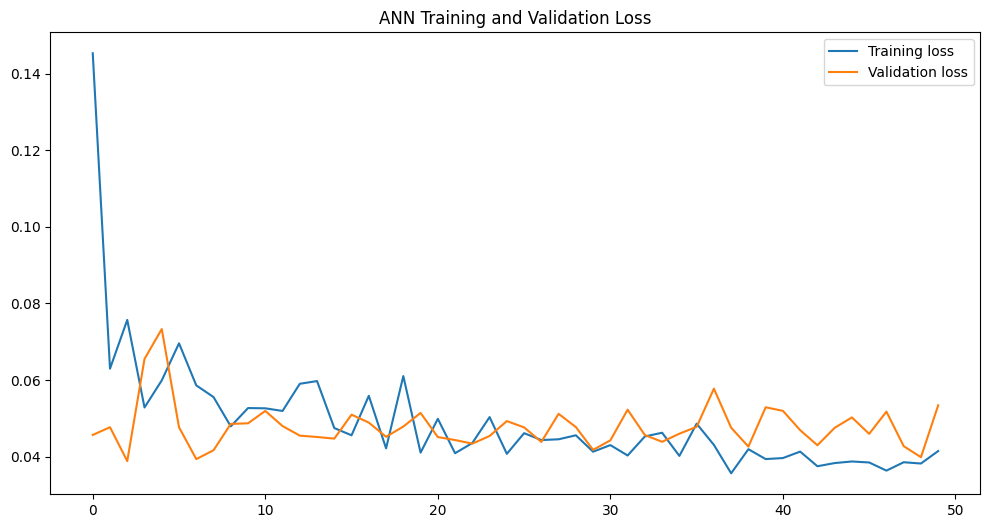

In [319]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [320]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [321]:
len(test_predictions)

29

In [322]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 9.6831
RMSE: 3.1118
MAE: 1.8819
MAPE: 264.10%
R²: -0.0002


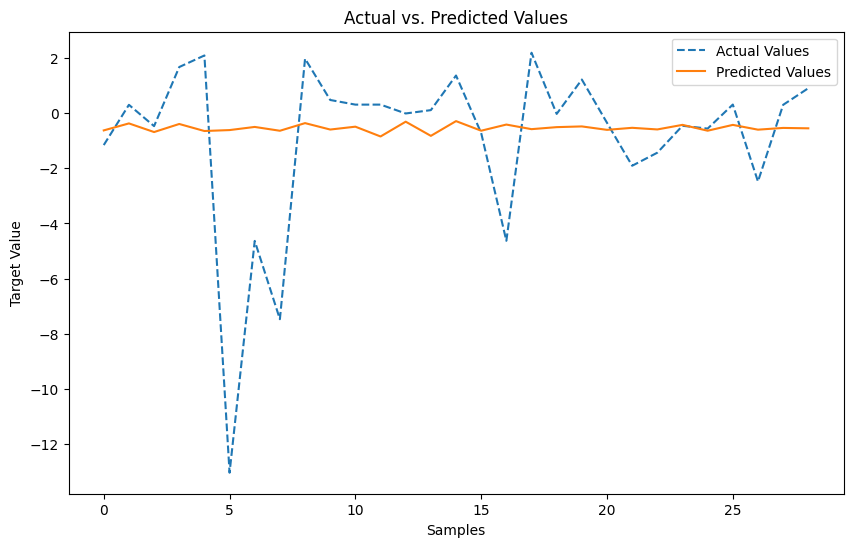

In [323]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

# Optimal FNNmodel

In [326]:

df=data.copy()
df = df.astype(float)

# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df


# Number of lags to create
lags = 9
lagged_features = create_lagged_features(df, lags)

print("Original DataFrame:")
print(df)


print("\nDataFrame with Lagged Features:")
print(lagged_features)
print(lagged_features.columns)
df2=lagged_features.dropna()
print(df2)
len(df2)
df2.isnull().sum()
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
df2
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]
train_data
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])
train_data
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest
from sklearn.preprocessing import MinMaxScaler
xtrain.columns
ytrain
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''
xtrain
df1=pd.DataFrame(ytrain)
X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)
X_train_scaled_df
df3= pd.concat([df1, X_train_scaled_df], axis=1)

df3
X_train_scaled_df
!pip install optuna

Original DataFrame:
            Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

DataFrame with Lagged Features:
            Residuals_SVR  Residuals_SVR_lag_1  Residuals_SVR_lag_2  \
Date                                                                  
2000-10-31       0.008275                  NaN                  NaN   
2000-11-30      -0.305147             0.008275                  NaN   
2000-12-31       3.588124            -0.305147             0.008275   
2001-01-31       4.862272             3.588124            -0.305147   
2001-02-28      -1.912424             4.862272             3.588124   
...                   ...                  ...                  ...   
2024-11-30      -

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1014 - mae: 0.2500 - val_loss: 0.0419 - val_mae: 0.1172
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0629 - mae: 0.1972 - val_loss: 0.0399 - val_mae: 0.1221
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0663 - mae: 0.2073 - val_loss: 0.0465 - val_mae: 0.1184
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0849 - mae: 0.2184 - val_loss: 0.0510 - val_mae: 0.1286
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0563 - mae: 0.1869 - val_loss: 0.0618 - val_mae: 0.1619
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0632 - mae: 0.2067 - val_loss: 0.0463 - val_mae: 0.1182
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0651 - mae: 0.2049 - val_loss: 0.0400 - val_mae: 0.1219
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0549 - mae: 0.1839 - val_loss: 0.0395 - val_mae: 0.1238
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0562 - mae: 0.1882 - 

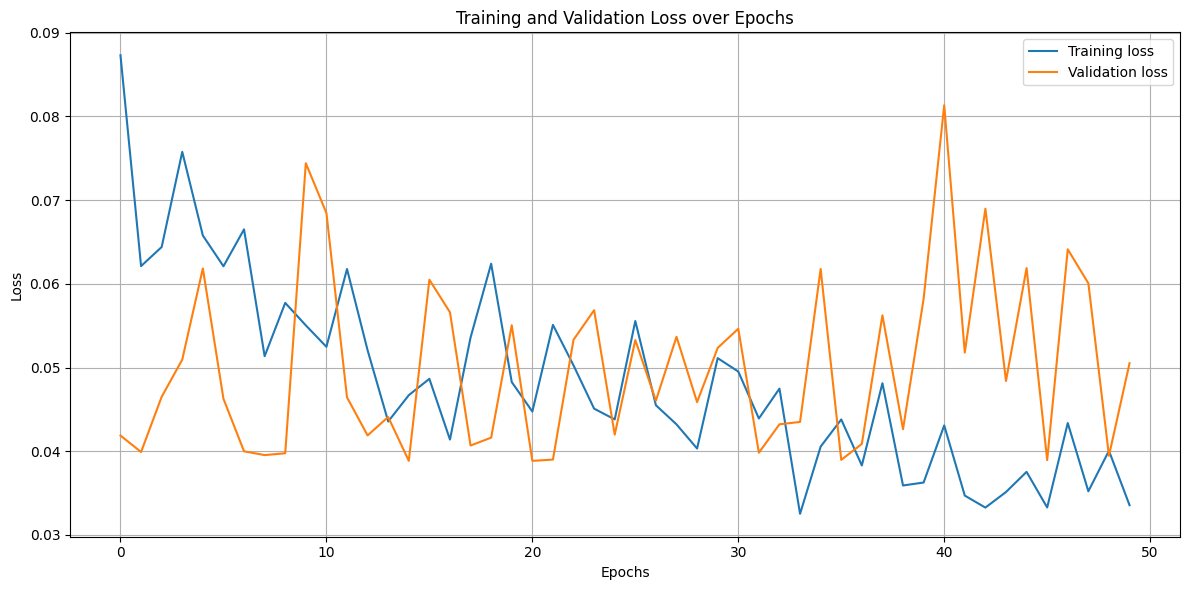

In [327]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#Best hyperparameters:  {'input_units': 16, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 128, 'dropout_rate_0': 0.09780146434365444, 'optimizer': 'SGD', 'batch_size': 48, 'epochs': 50}
# Best hyperparameters from Optuna
best_params = {
    'input_units': 16,
    'activation': 'sigmoid',
    'num_layers': 1,
    'n_units_0': 128,
    'dropout_rate_0': 0.09780146434365444,
    'optimizer': 'SGD',
    'batch_size': 48,
    'epochs': 50
}

# Build the FNN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'],
                input_dim=X_train_scaled_df.shape[1],
                activation=best_params['activation']))

# Hidden layers
for i in range(best_params['num_layers']):
    model.add(Dense(units=best_params[f'n_units_{i}'],
                    activation=best_params['activation']))
    model.add(Dropout(rate=best_params[f'dropout_rate_{i}']))

# Output layer for regression
model.add(Dense(units=1))

# Optimizer
optimizer = RMSprop()

# Compile model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,
    verbose=1
)

# Evaluate final loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}, Final MAE: {final_mae:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [330]:
data

Residuals_SVR
Date                     
2000-10-31       0.008275
2000-11-30      -0.305147
2000-12-31       3.588124
2001-01-31       4.862272
2001-02-28      -1.912424
...                   ...
2024-11-30      -0.563288
2024-12-31       0.307545
2025-01-31      -2.480250
2025-02-28       0.297586
2025-03-31       0.899539

[294 rows x 1 columns]

## Prediction on the full data set

In [332]:
import pandas as pd
import numpy as np

# Step 1: Prepare the full dataset (including lagged features)
df_full = data.copy().astype(float)

# Step 2: Create lagged features (same as used for training)
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df

lags = 9
lagged_full = create_lagged_features(df_full, lags)
df_full_lagged = lagged_full.dropna()

# Step 3: Separate features and target
X_full = df_full_lagged.drop(columns=["Residuals_SVR"])
y_full = df_full_lagged["Residuals_SVR"]

# Step 4: Scale features and target using the SAME scalers
X_full_scaled = scaler_X.transform(X_full)
y_full_reshaped = y_full.values.reshape(-1, 1)
y_full_scaled = scaler_y.transform(y_full_reshaped)

# Step 5: Make predictions on the full dataset
y_pred_scaled = model.predict(X_full_scaled)

# Step 6: Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_full_scaled)

# Step 7: Prepare a DataFrame with predictions and actuals
# Optional: Add back the date column if available
# Example: If you have a date column like `date_column` in original data
# Make sure to align indexes due to lagging

results_df = pd.DataFrame({
    "Actual": y_actual.flatten(),
    "Predicted": y_pred.flatten()
}, index=y_full.index)

# If your original dataframe had a datetime column, add it back here
# For example, if 'date' is in original df:
#results_df["Date"] = data.index[results_df.index]  # or replace with actual date column

# Step 8: Save to CSV
results_df.to_csv("FNN_predictions.csv", index=False)

print("Prediction results saved to 'FNN_predictions.csv'")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Prediction results saved to 'FNN_predictions.csv'


In [331]:
results_df

Actual  Predicted
Date                           
2001-07-31 -0.300480  -0.362133
2001-08-31 -1.028564  -0.183053
2001-09-30  3.964114  -0.127093
2001-10-31 -2.372974  -0.395065
2001-11-30  1.817974  -0.455703
...              ...        ...
2024-11-30 -0.563288  -0.352416
2024-12-31  0.307545  -0.284344
2025-01-31 -2.480250  -0.301453
2025-02-28  0.297586  -0.256014
2025-03-31  0.899539  -0.301322

[285 rows x 2 columns]

In [334]:
df_backup

Inflation  SVR_Prediction  Residuals_SVR
Date                                                
2000-10-31   7.794494        7.786219       0.008275
2000-11-30   7.559566        7.864713      -0.305147
2000-12-31  10.836729        7.248605       3.588124
2001-01-31  16.170425       11.308153       4.862272
2001-02-28  16.618124       18.530548      -1.912424
...               ...             ...            ...
2024-11-30  -2.068252       -1.504964      -0.563288
2024-12-31  -1.742696       -2.050241       0.307545
2025-01-31  -4.035874       -1.555624      -2.480250
2025-02-28  -4.187438       -4.485024       0.297586
2025-03-31  -2.592781       -3.492320       0.899539

[294 rows x 3 columns]

In [335]:
# Ensure both DataFrames have datetime index (if not, convert appropriately)
# Example: If 'Date' is a column in either dataframe:
# results_df.set_index('Date', inplace=True)
# df_backup.set_index('Date', inplace=True)

# Step 1: Convert index to datetime if not already
results_df.index = pd.to_datetime(results_df.index)
df_backup.index = pd.to_datetime(df_backup.index)

# Step 2: Merge on index
merged_df = results_df.merge(df_backup, left_index=True, right_index=True, how='inner')

# Step 3: Check result
print(merged_df.head())
print(f"Merged shape: {merged_df.shape}")

# Optional: Save merged DataFrame
merged_df.to_csv("merged_results.csv")


              Actual  Predicted  Inflation  SVR_Prediction  Residuals_SVR
Date                                                                     
2001-07-31 -0.300480  -0.362133  13.368984       13.669464      -0.300480
2001-08-31 -1.028564  -0.183053  11.421839       12.450404      -1.028564
2001-09-30  3.964114  -0.127093  14.946717       10.982603       3.964114
2001-10-31 -2.372974  -0.395065  14.127435       16.500408      -2.372974
2001-11-30  1.817974  -0.455703  14.852901       13.034927       1.817974
Merged shape: (285, 5)


In [336]:
merged_df

Actual  Predicted  Inflation  SVR_Prediction  Residuals_SVR
Date                                                                     
2001-07-31 -0.300480  -0.362133  13.368984       13.669464      -0.300480
2001-08-31 -1.028564  -0.183053  11.421839       12.450404      -1.028564
2001-09-30  3.964114  -0.127093  14.946717       10.982603       3.964114
2001-10-31 -2.372974  -0.395065  14.127435       16.500408      -2.372974
2001-11-30  1.817974  -0.455703  14.852901       13.034927       1.817974
...              ...        ...        ...             ...            ...
2024-11-30 -0.563288  -0.352416  -2.068252       -1.504964      -0.563288
2024-12-31  0.307545  -0.284344  -1.742696       -2.050241       0.307545
2025-01-31 -2.480250  -0.301453  -4.035874       -1.555624      -2.480250
2025-02-28  0.297586  -0.256014  -4.187438       -4.485024       0.297586
2025-03-31  0.899539  -0.301322  -2.592781       -3.492320       0.899539

[285 rows x 5 columns]

In [337]:
merged_df["SVR_FNN"]=merged_df["SVR_Prediction"]+merged_df["Predicted"]
merged_df

Actual  Predicted  Inflation  SVR_Prediction  Residuals_SVR  \
Date                                                                        
2001-07-31 -0.300480  -0.362133  13.368984       13.669464      -0.300480   
2001-08-31 -1.028564  -0.183053  11.421839       12.450404      -1.028564   
2001-09-30  3.964114  -0.127093  14.946717       10.982603       3.964114   
2001-10-31 -2.372974  -0.395065  14.127435       16.500408      -2.372974   
2001-11-30  1.817974  -0.455703  14.852901       13.034927       1.817974   
...              ...        ...        ...             ...            ...   
2024-11-30 -0.563288  -0.352416  -2.068252       -1.504964      -0.563288   
2024-12-31  0.307545  -0.284344  -1.742696       -2.050241       0.307545   
2025-01-31 -2.480250  -0.301453  -4.035874       -1.555624      -2.480250   
2025-02-28  0.297586  -0.256014  -4.187438       -4.485024       0.297586   
2025-03-31  0.899539  -0.301322  -2.592781       -3.492320       0.899539   

              SVR_FNN  
Date                   
2001-07-31  13.307331  
2001-08-31  12.267350  
2001-09-30  10.855510  
2001-10-31  16.105343  
2001-11-30  12.579224  
...               ...  
2024-11-30  -1.857380  
2024-12-31  -2.334585  
2025-01-31  -1.857077  
2025-02-28  -4.741038  
2025-03-31  -3.793642  

[285 rows x 6 columns]

# SVR_FNN

RMSE: 3.1925
MSE: 10.1920
MAE: 1.8699
MAPE: 63.56%
R-squared: 0.9760


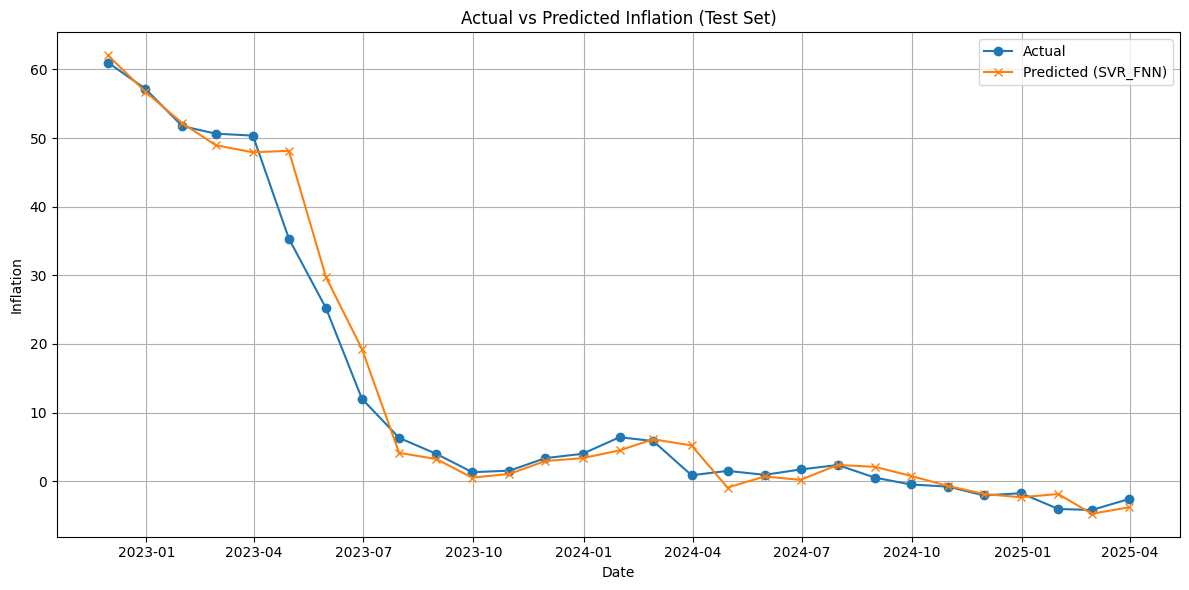

In [338]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define actual and predicted columns
actual = merged_df["Inflation"]
predicted = merged_df["SVR_FNN"]

# Step 2: Train-test split (90% train, 10% test)
split_index = int(len(merged_df) * 0.9)

# Train
actual_train = actual[:split_index]
predicted_train = predicted[:split_index]

# Test
actual_test = actual[split_index:]
predicted_test = predicted[split_index:]

# Step 3: Evaluation metrics on test set
mse = mean_squared_error(actual_test, predicted_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_test, predicted_test)
mape = np.mean(np.abs((actual_test - predicted_test) / actual_test)) * 100
r2 = r2_score(actual_test, predicted_test)

# Step 4: Print metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r2:.4f}")

# Step 5: Plot actual vs predicted (test set)
plt.figure(figsize=(12, 6))
plt.plot(actual_test.index, actual_test, label='Actual', marker='o')
plt.plot(predicted_test.index, predicted_test, label='Predicted (SVR_FNN)', marker='x')
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.title("Actual vs Predicted Inflation (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 10

In [324]:

df=data.copy()
df = df.astype(float)


In [ ]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [ ]:
# Number of lags to create
lags = 10
lagged_features = create_lagged_features(df, lags)


In [ ]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]


In [ ]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-01-31   0.329139              NaN              NaN              NaN   
2000-02-28   1.940367         0.329139              NaN              NaN   
2000-03-31   4.469678         1.940367         0.329139              NaN   
2000-04-30   3.672022         4.469678         1.940367         0.329139   
2000-05-31   2.382412         3.672022         4.469678         1.940367   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874

In [ ]:
print(lagged_features.columns)

Index(['Inflation', 'Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10'],
      dtype='object')


In [ ]:
df2=lagged_features.dropna()

In [ ]:
print(df2)
len(df2)

            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-11-30   7.559566         7.794494         8.455851         9.876072   
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

           

293

In [ ]:
df2.isnull().sum()

Inflation           0
Inflation_lag_1     0
Inflation_lag_2     0
Inflation_lag_3     0
Inflation_lag_4     0
Inflation_lag_5     0
Inflation_lag_6     0
Inflation_lag_7     0
Inflation_lag_8     0
Inflation_lag_9     0
Inflation_lag_10    0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df2

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-11-30   7.559566         7.794494         8.455851         9.876072   
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30        10.139831         6.799835         2.382412   
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
...                     ...              ...              ...   
2024-11-30         2.365931         1.716069         0.936037   
2024-12-31         0.526039         2.365931         1.716069   
2025-01-31        -0.469239         0.526039         2.365931   
2025-02-28        -0.783699        -0.469239         0.526039   
2025-03-31        -2.068252        -0.783699        -0.469239   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         3.672022         4.469678         1.940367   
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
...                     ...              ...              ...   
2024-11-30         1.508060         0.871795         5.857520   
2024-12-31         0.936037         1.508060         0.871795   
2025-01-31         1.716069         0.936037         1.508060   
2025-02-28         2.365931         1.716069         0.936037   
2025-03-31         0.526039         2.365931         1.716069   

            Inflation_lag_10  
Date                          
2000-11-30          0.329139  
2000-12-31          1.940367  
2001-01-31          4.469678  
2001-02-28          3.672022  
2001-03-31          2.382412  
...                      ...  
2024-11-30          6.415695  
2024-12-31          5.857520  
2025-01-31          0.871795  
2025-02-28          1.508060  
2025-03-31          0.936037  

[293 rows x 11 columns]

In [ ]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-11-30   7.559566         7.794494         8.455851         9.876072   
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30        10.139831         6.799835         2.382412   
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         3.672022         4.469678         1.940367   
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  
Date                          
2000-11-30          0.329139  
2000-12-31          1.940367  
2001-01-31          4.469678  
2001-02-28          3.672022  
2001-03-31          2.382412  
...                      ...  
2022-05-31          5.686854  
2022-06-30          5.982275  
2022-07-31          5.722671  
2022-08-31          7.619048  
2022-09-30          9.919767  

[263 rows x 11 columns]

In [ ]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-11-30   7.559566         7.794494         8.455851         9.876072   
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30        10.139831         6.799835         2.382412   
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         3.672022         4.469678         1.940367   
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  
Date                          
2000-11-30          0.329139  
2000-12-31          1.940367  
2001-01-31          4.469678  
2001-02-28          3.672022  
2001-03-31          2.382412  
...                      ...  
2022-05-31          5.686854  
2022-06-30          5.982275  
2022-07-31          5.722671  
2022-08-31          7.619048  
2022-09-30          9.919767  

[263 rows x 11 columns]

In [ ]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-10-31    65.963240
2022-11-30    60.982084
2022-12-31    57.207498
2023-01-31    51.729686
2023-02-28    50.635930
2023-03-31    50.346955
2023-04-30    35.327234
2023-05-31    25.195313
2023-06-30    11.997670
2023-07-31     6.316378
2023-08-31     3.993435
2023-09-30     1.320655
2023-10-31     1.538462
2023-11-30     3.367183
2023-12-31     3.997868
2024-01-31     6.415695
2024-02-28     5.857520
2024-03-31     0.871795
2024-04-30     1.508060
2024-05-31     0.936037
2024-06-30     1.716069
2024-07-31     2.365931
2024-08-31     0.526039
2024-09-30    -0.469239
2024-10-31    -0.783699
2024-11-30    -2.068252
2024-12-31    -1.742696
2025-01-31    -4.035874
2025-02-28    -4.187438
2025-03-31    -2.592781
Name: Inflation, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
xtrain.columns

Index(['Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10'],
      dtype='object')

In [ ]:
ytrain

Date
2000-11-30     7.559566
2000-12-31    10.836729
2001-01-31    16.170425
2001-02-28    16.618124
2001-03-31    13.213922
                ...    
2022-05-31    39.130435
2022-06-30    54.634831
2022-07-31    60.796646
2022-08-31    64.320557
2022-09-30    69.812630
Name: Inflation, Length: 263, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [ ]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [ ]:
xtrain

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-11-30         7.794494         8.455851         9.876072   
2000-12-31         7.559566         7.794494         8.455851   
2001-01-31        10.836729         7.559566         7.794494   
2001-02-28        16.170425        10.836729         7.559566   
2001-03-31        16.618124        16.170425        10.836729   
...                     ...              ...              ...   
2022-05-31        29.827089        18.718503        15.097052   
2022-06-30        39.130435        29.827089        18.718503   
2022-07-31        54.634831        39.130435        29.827089   
2022-08-31        60.796646        54.634831        39.130435   
2022-09-30        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30        10.139831         6.799835         2.382412   
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         3.672022         4.469678         1.940367   
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  
Date                          
2000-11-30          0.329139  
2000-12-31          1.940367  
2001-01-31          4.469678  
2001-02-28          3.672022  
2001-03-31          2.382412  
...                      ...  
2022-05-31          5.686854  
2022-06-30          5.982275  
2022-07-31          5.722671  
2022-08-31          7.619048  
2022-09-30          9.919767  

[263 rows x 10 columns]

In [ ]:
df1=pd.DataFrame(ytrain)

In [ ]:
X_train_scaled

array([[0.11081115, 0.12832836, 0.16935964, ..., 0.13546829, 0.04334777,
        0.        ],
       [0.1071156 , 0.11731426, 0.14300296, ..., 0.1064167 , 0.13546829,
        0.05779654],
       [0.15866734, 0.11340183, 0.13072938, ..., 0.05944757, 0.1064167 ,
        0.14852572],
       ...,
       [0.84763773, 0.63917587, 0.53961388, ..., 0.33396706, 0.25017212,
        0.19347197],
       [0.94456676, 0.89738255, 0.71226688, ..., 0.41342656, 0.33396706,
        0.26149712],
       [1.        , 1.        , 1.        , ..., 0.48997908, 0.41342656,
        0.34402647]])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-11-30         0.110811         0.128328         0.169360   
2000-12-31         0.107116         0.117314         0.143003   
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30         0.244648         0.208057         0.059448   
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         0.106417         0.135468         0.043348   
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  
Date                          
2000-11-30          0.000000  
2000-12-31          0.057797  
2001-01-31          0.148526  
2001-02-28          0.119913  
2001-03-31          0.073653  
...                      ...  
2022-05-31          0.192187  
2022-06-30          0.202784  
2022-07-31          0.193472  
2022-08-31          0.261497  
2022-09-30          0.344026  

[263 rows x 10 columns]

In [ ]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [ ]:
df3

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-11-30   7.559566         0.110811         0.128328         0.169360   
2000-12-31  10.836729         0.107116         0.117314         0.143003   
2001-01-31  16.170425         0.158667         0.113402         0.130729   
2001-02-28  16.618124         0.242570         0.167979         0.126370   
2001-03-31  13.213922         0.249612         0.256805         0.187188   
...               ...              ...              ...              ...   
2022-05-31  39.130435         0.457397         0.299240         0.266251   
2022-06-30  54.634831         0.603744         0.484240         0.333459   
2022-07-31  60.796646         0.847638         0.639176         0.539614   
2022-08-31  64.320557         0.944567         0.897383         0.712267   
2022-09-30  69.812630         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30         0.244648         0.208057         0.059448   
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         0.106417         0.135468         0.043348   
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  
Date                          
2000-11-30          0.000000  
2000-12-31          0.057797  
2001-01-31          0.148526  
2001-02-28          0.119913  
2001-03-31          0.073653  
...                      ...  
2022-05-31          0.192187  
2022-06-30          0.202784  
2022-07-31          0.193472  
2022-08-31          0.261497  
2022-09-30          0.344026  

[263 rows x 11 columns]

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-11-30         0.110811         0.128328         0.169360   
2000-12-31         0.107116         0.117314         0.143003   
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-11-30         0.244648         0.208057         0.059448   
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-11-30         0.106417         0.135468         0.043348   
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  
Date                          
2000-11-30          0.000000  
2000-12-31          0.057797  
2001-01-31          0.148526  
2001-02-28          0.119913  
2001-03-31          0.073653  
...                      ...  
2022-05-31          0.192187  
2022-06-30          0.202784  
2022-07-31          0.193472  
2022-08-31          0.261497  
2022-09-30          0.344026  

[263 rows x 10 columns]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-04-08 04:49:44,455] A new study created in memory with name: no-name-f1b0a812-4980-433a-a210-b37da85e1efd
[I 2025-04-08 04:50:05,349] Trial 0 finished with value: 0.0013524359441362322 and parameters: {'input_units': 96, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.37464561010296726, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 70}. Best is trial 0 with value: 0.0013524359441362322.
[I 2025-04-08 04:50:31,492] Trial 1 finished with value: 0.02102280715480447 and parameters: {'input_units': 16, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 48, 'dropout_rate_0': 0.235735756613291, 'optimizer': 'SGD', 'batch_size': 48, 'epochs': 100}. Best is trial 0 with value: 0.0013524359441362322.
[I 2025-04-08 04:50:35,995] Trial 2 finished with value: 0.007689424545969814 and parameters: {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.32813868616824055, 'optimizer': 'SGD', 'batch_size': 48, 'epoch

Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.20864181759484213, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 100}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.20864181759484213, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 100}
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0406 - mae: 0.1510 - val_loss: 0.0484 - val_mae: 0.1428
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - mae: 0.0790 - val_loss: 0.0905 - val_mae: 0.1872
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - mae: 0.0723 - val_loss: 0.0213 - val_mae: 0.0874
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mae: 0.0581 - val_loss: 0.0287 - val_mae: 0.0998
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mae: 0.0536 - val_loss: 0.0142 - val_mae: 0.0699
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - mae: 0.0497 - val_loss: 0.0212 - val_mae: 0.0828
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037 - mae: 0.0440 - val_loss: 0.0143 - val_mae: 0.0

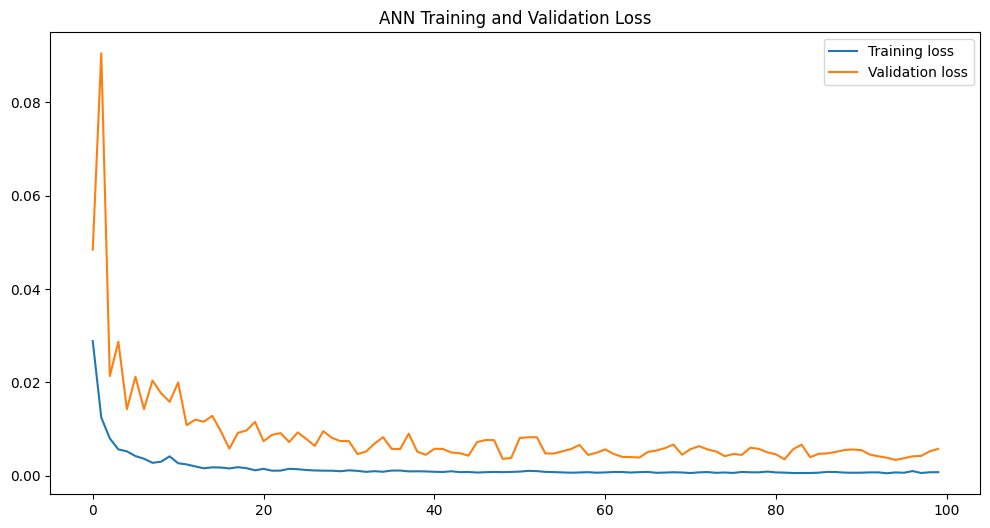

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [ ]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
len(test_predictions)

30

In [ ]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 36.3341
RMSE: 6.0278
MAE: 3.8857
MAPE: 91.89%
R²: 0.9277


In [ ]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 36.3341
RMSE: 6.0278
MAE: 3.8857
MAPE: 91.89%
R²: 0.9277


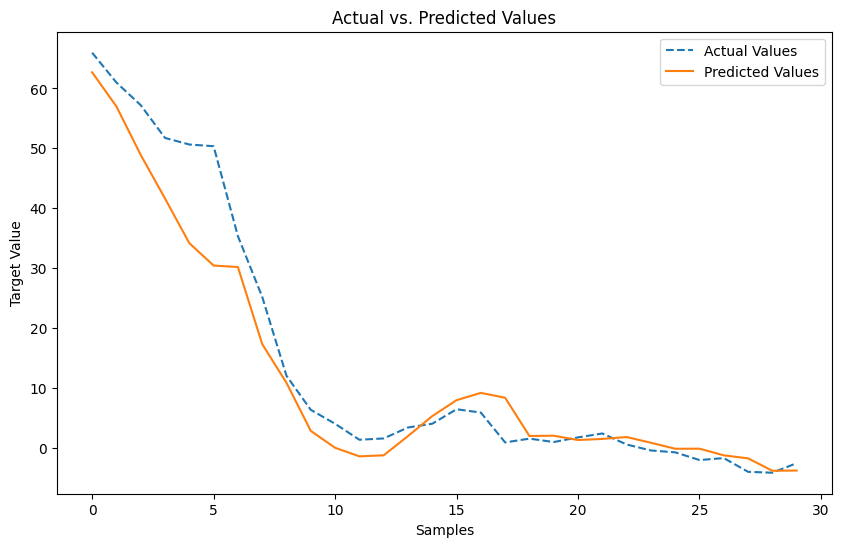

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 11

In [ ]:

df=data.copy()
df = df.astype(float)


In [ ]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [ ]:
# Number of lags to create
lags = 11
lagged_features = create_lagged_features(df, lags)


In [ ]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]


In [ ]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-01-31   0.329139              NaN              NaN              NaN   
2000-02-28   1.940367         0.329139              NaN              NaN   
2000-03-31   4.469678         1.940367         0.329139              NaN   
2000-04-30   3.672022         4.469678         1.940367         0.329139   
2000-05-31   2.382412         3.672022         4.469678         1.940367   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874

In [ ]:
print(lagged_features.columns)

Index(['Inflation', 'Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10', 'Inflation_lag_11'],
      dtype='object')


In [ ]:
df2=lagged_features.dropna()

In [ ]:
print(df2)
len(df2)

            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

           

292

In [ ]:
df2.isnull().sum()

Inflation           0
Inflation_lag_1     0
Inflation_lag_2     0
Inflation_lag_3     0
Inflation_lag_4     0
Inflation_lag_5     0
Inflation_lag_6     0
Inflation_lag_7     0
Inflation_lag_8     0
Inflation_lag_9     0
Inflation_lag_10    0
Inflation_lag_11    0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df2

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
...                     ...              ...              ...   
2024-11-30         2.365931         1.716069         0.936037   
2024-12-31         0.526039         2.365931         1.716069   
2025-01-31        -0.469239         0.526039         2.365931   
2025-02-28        -0.783699        -0.469239         0.526039   
2025-03-31        -2.068252        -0.783699        -0.469239   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
...                     ...              ...              ...   
2024-11-30         1.508060         0.871795         5.857520   
2024-12-31         0.936037         1.508060         0.871795   
2025-01-31         1.716069         0.936037         1.508060   
2025-02-28         2.365931         1.716069         0.936037   
2025-03-31         0.526039         2.365931         1.716069   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          1.940367          0.329139  
2001-01-31          4.469678          1.940367  
2001-02-28          3.672022          4.469678  
2001-03-31          2.382412          3.672022  
2001-04-30          6.799835          2.382412  
...                      ...               ...  
2024-11-30          6.415695          3.997868  
2024-12-31          5.857520          6.415695  
2025-01-31          0.871795          5.857520  
2025-02-28          1.508060          0.871795  
2025-03-31          0.936037          1.508060  

[292 rows x 12 columns]

In [ ]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          1.940367          0.329139  
2001-01-31          4.469678          1.940367  
2001-02-28          3.672022          4.469678  
2001-03-31          2.382412          3.672022  
2001-04-30          6.799835          2.382412  
...                      ...               ...  
2022-05-31          5.686854          5.247598  
2022-06-30          5.982275          5.686854  
2022-07-31          5.722671          5.982275  
2022-08-31          7.619048          5.722671  
2022-09-30          9.919767          7.619048  

[262 rows x 12 columns]

In [ ]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-12-31  10.836729         7.559566         7.794494         8.455851   
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          1.940367          0.329139  
2001-01-31          4.469678          1.940367  
2001-02-28          3.672022          4.469678  
2001-03-31          2.382412          3.672022  
2001-04-30          6.799835          2.382412  
...                      ...               ...  
2022-05-31          5.686854          5.247598  
2022-06-30          5.982275          5.686854  
2022-07-31          5.722671          5.982275  
2022-08-31          7.619048          5.722671  
2022-09-30          9.919767          7.619048  

[262 rows x 12 columns]

In [ ]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-10-31    65.963240
2022-11-30    60.982084
2022-12-31    57.207498
2023-01-31    51.729686
2023-02-28    50.635930
2023-03-31    50.346955
2023-04-30    35.327234
2023-05-31    25.195313
2023-06-30    11.997670
2023-07-31     6.316378
2023-08-31     3.993435
2023-09-30     1.320655
2023-10-31     1.538462
2023-11-30     3.367183
2023-12-31     3.997868
2024-01-31     6.415695
2024-02-28     5.857520
2024-03-31     0.871795
2024-04-30     1.508060
2024-05-31     0.936037
2024-06-30     1.716069
2024-07-31     2.365931
2024-08-31     0.526039
2024-09-30    -0.469239
2024-10-31    -0.783699
2024-11-30    -2.068252
2024-12-31    -1.742696
2025-01-31    -4.035874
2025-02-28    -4.187438
2025-03-31    -2.592781
Name: Inflation, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
xtrain.columns

Index(['Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10', 'Inflation_lag_11'],
      dtype='object')

In [ ]:
ytrain

Date
2000-12-31    10.836729
2001-01-31    16.170425
2001-02-28    16.618124
2001-03-31    13.213922
2001-04-30    13.874019
                ...    
2022-05-31    39.130435
2022-06-30    54.634831
2022-07-31    60.796646
2022-08-31    64.320557
2022-09-30    69.812630
Name: Inflation, Length: 262, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [ ]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [ ]:
xtrain

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-12-31         7.559566         7.794494         8.455851   
2001-01-31        10.836729         7.559566         7.794494   
2001-02-28        16.170425        10.836729         7.559566   
2001-03-31        16.618124        16.170425        10.836729   
2001-04-30        13.213922        16.618124        16.170425   
...                     ...              ...              ...   
2022-05-31        29.827089        18.718503        15.097052   
2022-06-30        39.130435        29.827089        18.718503   
2022-07-31        54.634831        39.130435        29.827089   
2022-08-31        60.796646        54.634831        39.130435   
2022-09-30        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         9.876072        10.139831         6.799835   
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         2.382412         3.672022         4.469678   
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          1.940367          0.329139  
2001-01-31          4.469678          1.940367  
2001-02-28          3.672022          4.469678  
2001-03-31          2.382412          3.672022  
2001-04-30          6.799835          2.382412  
...                      ...               ...  
2022-05-31          5.686854          5.247598  
2022-06-30          5.982275          5.686854  
2022-07-31          5.722671          5.982275  
2022-08-31          7.619048          5.722671  
2022-09-30          9.919767          7.619048  

[262 rows x 11 columns]

In [ ]:
df1=pd.DataFrame(ytrain)

In [ ]:
X_train_scaled

array([[0.1071156 , 0.11731426, 0.14300296, ..., 0.13546829, 0.04334777,
        0.        ],
       [0.15866734, 0.11340183, 0.13072938, ..., 0.1064167 , 0.13546829,
        0.05779654],
       [0.24256957, 0.16797895, 0.12636955, ..., 0.05944757, 0.1064167 ,
        0.14852572],
       ...,
       [0.84763773, 0.63917587, 0.53961388, ..., 0.25017212, 0.18110379,
        0.20278426],
       [0.94456676, 0.89738255, 0.71226688, ..., 0.33396706, 0.25017212,
        0.19347197],
       [1.        , 1.        , 1.        , ..., 0.41342656, 0.33396706,
        0.26149712]])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-12-31         0.107116         0.117314         0.143003   
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
2001-04-30         0.196062         0.264261         0.286171   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          0.043348          0.000000  
2001-01-31          0.135468          0.057797  
2001-02-28          0.106417          0.148526  
2001-03-31          0.059448          0.119913  
2001-04-30          0.220335          0.073653  
...                      ...               ...  
2022-05-31          0.179799          0.176431  
2022-06-30          0.190559          0.192187  
2022-07-31          0.181104          0.202784  
2022-08-31          0.250172          0.193472  
2022-09-30          0.333967          0.261497  

[262 rows x 11 columns]

In [ ]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [ ]:
df3

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-12-31  10.836729         0.107116         0.117314         0.143003   
2001-01-31  16.170425         0.158667         0.113402         0.130729   
2001-02-28  16.618124         0.242570         0.167979         0.126370   
2001-03-31  13.213922         0.249612         0.256805         0.187188   
2001-04-30  13.874019         0.196062         0.264261         0.286171   
...               ...              ...              ...              ...   
2022-05-31  39.130435         0.457397         0.299240         0.266251   
2022-06-30  54.634831         0.603744         0.484240         0.333459   
2022-07-31  60.796646         0.847638         0.639176         0.539614   
2022-08-31  64.320557         0.944567         0.897383         0.712267   
2022-09-30  69.812630         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          0.043348          0.000000  
2001-01-31          0.135468          0.057797  
2001-02-28          0.106417          0.148526  
2001-03-31          0.059448          0.119913  
2001-04-30          0.220335          0.073653  
...                      ...               ...  
2022-05-31          0.179799          0.176431  
2022-06-30          0.190559          0.192187  
2022-07-31          0.181104          0.202784  
2022-08-31          0.250172          0.193472  
2022-09-30          0.333967          0.261497  

[262 rows x 12 columns]

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2000-12-31         0.107116         0.117314         0.143003   
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
2001-04-30         0.196062         0.264261         0.286171   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2000-12-31         0.237776         0.322924         0.220335   
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2000-12-31         0.059448         0.106417         0.135468   
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  
Date                                            
2000-12-31          0.043348          0.000000  
2001-01-31          0.135468          0.057797  
2001-02-28          0.106417          0.148526  
2001-03-31          0.059448          0.119913  
2001-04-30          0.220335          0.073653  
...                      ...               ...  
2022-05-31          0.179799          0.176431  
2022-06-30          0.190559          0.192187  
2022-07-31          0.181104          0.202784  
2022-08-31          0.250172          0.193472  
2022-09-30          0.333967          0.261497  

[262 rows x 11 columns]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-04-08 05:10:26,538] A new study created in memory with name: no-name-30bc1341-8dd1-4fef-9394-f5fcd41d7be5
[I 2025-04-08 05:10:41,448] Trial 0 finished with value: 0.0033430524985305966 and parameters: {'input_units': 16, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.0007544030549843095, 'n_units_1': 128, 'dropout_rate_1': 0.4555979022919411, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 50}. Best is trial 0 with value: 0.0033430524985305966.
[I 2025-04-08 05:11:00,331] Trial 1 finished with value: 0.00391613082611002 and parameters: {'input_units': 80, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.15780988723122008, 'n_units_1': 96, 'dropout_rate_1': 0.017190589270882628, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 50}. Best is trial 0 with value: 0.0033430524985305966.
[I 2025-04-08 05:11:12,340] Trial 2 finished with value: 0.016568122338503598 and parameters: {'input_units': 128, 'activation': 'relu', 'n

Best hyperparameters:  {'input_units': 128, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.06621925114926648, 'n_units_1': 16, 'dropout_rate_1': 0.12090315115719925, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 70}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 128, 'activation': 'tanh', 'num_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.06621925114926648, 'n_units_1': 16, 'dropout_rate_1': 0.12090315115719925, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 70}
Epoch 1/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0443 - mae: 0.1540 - val_loss: 0.0634 - val_mae: 0.1485
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0129 - mae: 0.0883 - val_loss: 0.0934 - val_mae: 0.1750
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115 - mae: 0.0772 - val_loss: 0.0159 - val_mae: 0.0764
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066 - mae: 0.0598 - val_loss: 0.0102 - val_mae: 0.0583
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mae: 0.0557 - val_loss: 0.0364 - val_mae: 0.1206
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mae: 0.0613 - val_loss: 0.0123 - val_mae: 0.0696
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.00

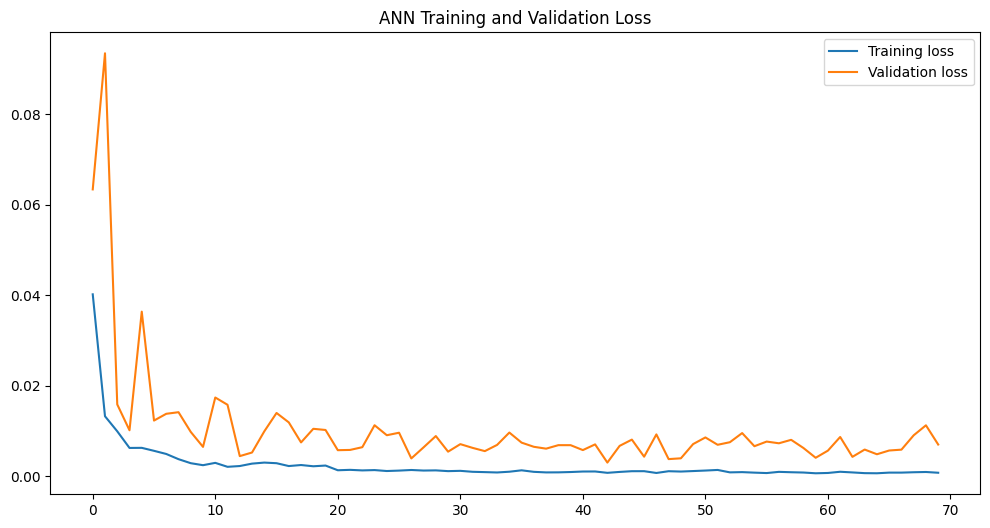

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [ ]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [ ]:
from sklearn.metrics import r2_score

# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# R-squared (R²)
r2 = r2_score(y_test_original, test_predictions)

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


MSE: 37.3125
RMSE: 6.1084
MAE: 4.5467
MAPE: 119.32%
R²: 0.9258


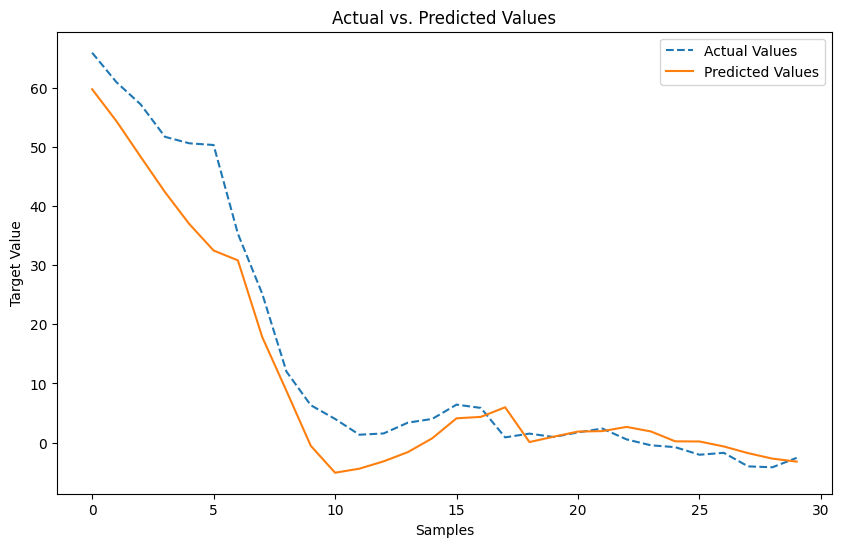

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## 12

In [ ]:
data

Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]

In [ ]:

df=data.copy()
df = df.astype(float)


In [ ]:
# Function to create lagged features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return lagged_df



In [ ]:
# Number of lags to create
lags = 12
lagged_features = create_lagged_features(df, lags)


In [ ]:
print("Original DataFrame:")
print(df)



Original DataFrame:
            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]


In [ ]:
print("\nDataFrame with Lagged Features:")
print(lagged_features)


DataFrame with Lagged Features:
            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2000-01-31   0.329139              NaN              NaN              NaN   
2000-02-28   1.940367         0.329139              NaN              NaN   
2000-03-31   4.469678         1.940367         0.329139              NaN   
2000-04-30   3.672022         4.469678         1.940367         0.329139   
2000-05-31   2.382412         3.672022         4.469678         1.940367   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874

In [ ]:
print(lagged_features.columns)

Index(['Inflation', 'Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10', 'Inflation_lag_11', 'Inflation_lag_12'],
      dtype='object')


In [ ]:
df2=lagged_features.dropna()

In [ ]:
print(df2)
len(df2)

            Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
2001-05-31  16.256885        13.874019        13.213922        16.618124   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

           

291

In [ ]:
df2.isnull().sum()

Inflation           0
Inflation_lag_1     0
Inflation_lag_2     0
Inflation_lag_3     0
Inflation_lag_4     0
Inflation_lag_5     0
Inflation_lag_6     0
Inflation_lag_7     0
Inflation_lag_8     0
Inflation_lag_9     0
Inflation_lag_10    0
Inflation_lag_11    0
Inflation_lag_12    0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df2

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
2001-05-31  16.256885        13.874019        13.213922        16.618124   
...               ...              ...              ...              ...   
2024-11-30  -2.068252        -0.783699        -0.469239         0.526039   
2024-12-31  -1.742696        -2.068252        -0.783699        -0.469239   
2025-01-31  -4.035874        -1.742696        -2.068252        -0.783699   
2025-02-28  -4.187438        -4.035874        -1.742696        -2.068252   
2025-03-31  -2.592781        -4.187438        -4.035874        -1.742696   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
2001-05-31        16.170425        10.836729         7.559566   
...                     ...              ...              ...   
2024-11-30         2.365931         1.716069         0.936037   
2024-12-31         0.526039         2.365931         1.716069   
2025-01-31        -0.469239         0.526039         2.365931   
2025-02-28        -0.783699        -0.469239         0.526039   
2025-03-31        -2.068252        -0.783699        -0.469239   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
2001-05-31         7.794494         8.455851         9.876072   
...                     ...              ...              ...   
2024-11-30         1.508060         0.871795         5.857520   
2024-12-31         0.936037         1.508060         0.871795   
2025-01-31         1.716069         0.936037         1.508060   
2025-02-28         2.365931         1.716069         0.936037   
2025-03-31         0.526039         2.365931         1.716069   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          4.469678          1.940367          0.329139  
2001-02-28          3.672022          4.469678          1.940367  
2001-03-31          2.382412          3.672022          4.469678  
2001-04-30          6.799835          2.382412          3.672022  
2001-05-31         10.139831          6.799835          2.382412  
...                      ...               ...               ...  
2024-11-30          6.415695          3.997868          3.367183  
2024-12-31          5.857520          6.415695          3.997868  
2025-01-31          0.871795          5.857520          6.415695  
2025-02-28          1.508060          0.871795          5.857520  
2025-03-31          0.936037          1.508060          0.871795  

[291 rows x 13 columns]

In [ ]:
train_size = int(len(df2) * 0.9)
train_data = df2.iloc[:train_size]
test_data = df2.iloc[train_size:]

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
2001-05-31  16.256885        13.874019        13.213922        16.618124   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
2001-05-31        16.170425        10.836729         7.559566   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
2001-05-31         7.794494         8.455851         9.876072   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          4.469678          1.940367          0.329139  
2001-02-28          3.672022          4.469678          1.940367  
2001-03-31          2.382412          3.672022          4.469678  
2001-04-30          6.799835          2.382412          3.672022  
2001-05-31         10.139831          6.799835          2.382412  
...                      ...               ...               ...  
2022-05-31          5.686854          5.247598          4.545455  
2022-06-30          5.982275          5.686854          5.247598  
2022-07-31          5.722671          5.982275          5.686854  
2022-08-31          7.619048          5.722671          5.982275  
2022-09-30          9.919767          7.619048          5.722671  

[261 rows x 13 columns]

In [ ]:
xtrain=train_data.drop(columns=['Residuals_SVR'])
xtest=test_data.drop(columns=['Residuals_SVR'])

In [ ]:
train_data

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2001-01-31  16.170425        10.836729         7.559566         7.794494   
2001-02-28  16.618124        16.170425        10.836729         7.559566   
2001-03-31  13.213922        16.618124        16.170425        10.836729   
2001-04-30  13.874019        13.213922        16.618124        16.170425   
2001-05-31  16.256885        13.874019        13.213922        16.618124   
...               ...              ...              ...              ...   
2022-05-31  39.130435        29.827089        18.718503        15.097052   
2022-06-30  54.634831        39.130435        29.827089        18.718503   
2022-07-31  60.796646        54.634831        39.130435        29.827089   
2022-08-31  64.320557        60.796646        54.634831        39.130435   
2022-09-30  69.812630        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
2001-05-31        16.170425        10.836729         7.559566   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
2001-05-31         7.794494         8.455851         9.876072   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          4.469678          1.940367          0.329139  
2001-02-28          3.672022          4.469678          1.940367  
2001-03-31          2.382412          3.672022          4.469678  
2001-04-30          6.799835          2.382412          3.672022  
2001-05-31         10.139831          6.799835          2.382412  
...                      ...               ...               ...  
2022-05-31          5.686854          5.247598          4.545455  
2022-06-30          5.982275          5.686854          5.247598  
2022-07-31          5.722671          5.982275          5.686854  
2022-08-31          7.619048          5.722671          5.982275  
2022-09-30          9.919767          7.619048          5.722671  

[261 rows x 13 columns]

In [ ]:
#ytrain=train_data['date','textile_exports']
ytrain=train_data["Residuals_SVR"]
ytest=test_data["Residuals_SVR"]
ytest

Date
2022-10-31    65.963240
2022-11-30    60.982084
2022-12-31    57.207498
2023-01-31    51.729686
2023-02-28    50.635930
2023-03-31    50.346955
2023-04-30    35.327234
2023-05-31    25.195313
2023-06-30    11.997670
2023-07-31     6.316378
2023-08-31     3.993435
2023-09-30     1.320655
2023-10-31     1.538462
2023-11-30     3.367183
2023-12-31     3.997868
2024-01-31     6.415695
2024-02-28     5.857520
2024-03-31     0.871795
2024-04-30     1.508060
2024-05-31     0.936037
2024-06-30     1.716069
2024-07-31     2.365931
2024-08-31     0.526039
2024-09-30    -0.469239
2024-10-31    -0.783699
2024-11-30    -2.068252
2024-12-31    -1.742696
2025-01-31    -4.035874
2025-02-28    -4.187438
2025-03-31    -2.592781
Name: Inflation, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
xtrain.columns

Index(['Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3',
       'Inflation_lag_4', 'Inflation_lag_5', 'Inflation_lag_6',
       'Inflation_lag_7', 'Inflation_lag_8', 'Inflation_lag_9',
       'Inflation_lag_10', 'Inflation_lag_11', 'Inflation_lag_12'],
      dtype='object')

In [ ]:
ytrain

Date
2001-01-31    16.170425
2001-02-28    16.618124
2001-03-31    13.213922
2001-04-30    13.874019
2001-05-31    16.256885
                ...    
2022-05-31    39.130435
2022-06-30    54.634831
2022-07-31    60.796646
2022-08-31    64.320557
2022-09-30    69.812630
Name: Inflation, Length: 261, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X (features)
X_train_scaled = scaler_X.fit_transform(xtrain)
X_test_scaled = scaler_X.transform(xtest)

# Reshape ytrain and ytest to be 2D arrays
y_train_reshaped = ytrain.values.reshape(-1, 1)  # Convert to NumPy and reshape
y_test_reshaped = ytest.values.reshape(-1, 1)

# Fit and transform the training data for y (target)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [ ]:
'''# Step 2: Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)'''

'# Step 2: Initialize the Min-Max Scaler\nscaler = MinMaxScaler()\n\n# Step 3: Fit the scaler on the training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(xtrain)\nX_test_scaled = scaler.transform(xtest)'

In [ ]:
xtrain

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2001-01-31        10.836729         7.559566         7.794494   
2001-02-28        16.170425        10.836729         7.559566   
2001-03-31        16.618124        16.170425        10.836729   
2001-04-30        13.213922        16.618124        16.170425   
2001-05-31        13.874019        13.213922        16.618124   
...                     ...              ...              ...   
2022-05-31        29.827089        18.718503        15.097052   
2022-06-30        39.130435        29.827089        18.718503   
2022-07-31        54.634831        39.130435        29.827089   
2022-08-31        60.796646        54.634831        39.130435   
2022-09-30        64.320557        60.796646        54.634831   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         8.455851         9.876072        10.139831   
2001-02-28         7.794494         8.455851         9.876072   
2001-03-31         7.559566         7.794494         8.455851   
2001-04-30        10.836729         7.559566         7.794494   
2001-05-31        16.170425        10.836729         7.559566   
...                     ...              ...              ...   
2022-05-31        14.203317        12.101449         9.919767   
2022-06-30        15.097052        14.203317        12.101449   
2022-07-31        18.718503        15.097052        14.203317   
2022-08-31        29.827089        18.718503        15.097052   
2022-09-30        39.130435        29.827089        18.718503   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         6.799835         2.382412         3.672022   
2001-02-28        10.139831         6.799835         2.382412   
2001-03-31         9.876072        10.139831         6.799835   
2001-04-30         8.455851         9.876072        10.139831   
2001-05-31         7.794494         8.455851         9.876072   
...                     ...              ...              ...   
2022-05-31         7.619048         5.722671         5.982275   
2022-06-30         9.919767         7.619048         5.722671   
2022-07-31        12.101449         9.919767         7.619048   
2022-08-31        14.203317        12.101449         9.919767   
2022-09-30        15.097052        14.203317        12.101449   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          4.469678          1.940367          0.329139  
2001-02-28          3.672022          4.469678          1.940367  
2001-03-31          2.382412          3.672022          4.469678  
2001-04-30          6.799835          2.382412          3.672022  
2001-05-31         10.139831          6.799835          2.382412  
...                      ...               ...               ...  
2022-05-31          5.686854          5.247598          4.545455  
2022-06-30          5.982275          5.686854          5.247598  
2022-07-31          5.722671          5.982275          5.686854  
2022-08-31          7.619048          5.722671          5.982275  
2022-09-30          9.919767          7.619048          5.722671  

[261 rows x 12 columns]

In [ ]:
df1=pd.DataFrame(ytrain)

In [ ]:
X_train_scaled

array([[0.15866734, 0.11340183, 0.13072938, ..., 0.13546829, 0.04334777,
        0.        ],
       [0.24256957, 0.16797895, 0.12636955, ..., 0.1064167 , 0.13546829,
        0.05779654],
       [0.24961214, 0.25680511, 0.18718768, ..., 0.05944757, 0.1064167 ,
        0.14852572],
       ...,
       [0.84763773, 0.63917587, 0.53961388, ..., 0.18110379, 0.19055889,
        0.19218718],
       [0.94456676, 0.89738255, 0.71226688, ..., 0.25017212, 0.18110379,
        0.20278426],
       [1.        , 1.        , 1.        , ..., 0.33396706, 0.25017212,
        0.19347197]])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=xtrain.columns, index=xtrain.index)

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
2001-04-30         0.196062         0.264261         0.286171   
2001-05-31         0.206446         0.207568         0.294480   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
2001-05-31         0.401775         0.346892         0.248006   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
2001-05-31         0.256562         0.280650         0.332376   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          0.135468          0.043348          0.000000  
2001-02-28          0.106417          0.135468          0.057797  
2001-03-31          0.059448          0.106417          0.148526  
2001-04-30          0.220335          0.059448          0.119913  
2001-05-31          0.341982          0.220335          0.073653  
...                      ...               ...               ...  
2022-05-31          0.179799          0.163801          0.151244  
2022-06-30          0.190559          0.179799          0.176431  
2022-07-31          0.181104          0.190559          0.192187  
2022-08-31          0.250172          0.181104          0.202784  
2022-09-30          0.333967          0.250172          0.193472  

[261 rows x 12 columns]

In [ ]:
df3= pd.concat([df1, X_train_scaled_df], axis=1)


In [ ]:
df3

Inflation  Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                                       
2001-01-31  16.170425         0.158667         0.113402         0.130729   
2001-02-28  16.618124         0.242570         0.167979         0.126370   
2001-03-31  13.213922         0.249612         0.256805         0.187188   
2001-04-30  13.874019         0.196062         0.264261         0.286171   
2001-05-31  16.256885         0.206446         0.207568         0.294480   
...               ...              ...              ...              ...   
2022-05-31  39.130435         0.457397         0.299240         0.266251   
2022-06-30  54.634831         0.603744         0.484240         0.333459   
2022-07-31  60.796646         0.847638         0.639176         0.539614   
2022-08-31  64.320557         0.944567         0.897383         0.712267   
2022-09-30  69.812630         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
2001-05-31         0.401775         0.346892         0.248006   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
2001-05-31         0.256562         0.280650         0.332376   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          0.135468          0.043348          0.000000  
2001-02-28          0.106417          0.135468          0.057797  
2001-03-31          0.059448          0.106417          0.148526  
2001-04-30          0.220335          0.059448          0.119913  
2001-05-31          0.341982          0.220335          0.073653  
...                      ...               ...               ...  
2022-05-31          0.179799          0.163801          0.151244  
2022-06-30          0.190559          0.179799          0.176431  
2022-07-31          0.181104          0.190559          0.192187  
2022-08-31          0.250172          0.181104          0.202784  
2022-09-30          0.333967          0.250172          0.193472  

[261 rows x 13 columns]

In [ ]:
X_train_scaled_df

Inflation_lag_1  Inflation_lag_2  Inflation_lag_3  \
Date                                                            
2001-01-31         0.158667         0.113402         0.130729   
2001-02-28         0.242570         0.167979         0.126370   
2001-03-31         0.249612         0.256805         0.187188   
2001-04-30         0.196062         0.264261         0.286171   
2001-05-31         0.206446         0.207568         0.294480   
...                     ...              ...              ...   
2022-05-31         0.457397         0.299240         0.266251   
2022-06-30         0.603744         0.484240         0.333459   
2022-07-31         0.847638         0.639176         0.539614   
2022-08-31         0.944567         0.897383         0.712267   
2022-09-30         1.000000         1.000000         1.000000   

            Inflation_lag_4  Inflation_lag_5  Inflation_lag_6  \
Date                                                            
2001-01-31         0.200772         0.313853         0.341982   
2001-02-28         0.183540         0.265010         0.332376   
2001-03-31         0.177419         0.242265         0.280650   
2001-04-30         0.262806         0.234185         0.256562   
2001-05-31         0.401775         0.346892         0.248006   
...                     ...              ...              ...   
2022-05-31         0.350522         0.390388         0.333967   
2022-06-30         0.373809         0.462674         0.413427   
2022-07-31         0.468166         0.493411         0.489979   
2022-08-31         0.757601         0.617958         0.522530   
2022-09-30         1.000000         1.000000         0.654428   

            Inflation_lag_7  Inflation_lag_8  Inflation_lag_9  \
Date                                                            
2001-01-31         0.220335         0.059448         0.106417   
2001-02-28         0.341982         0.220335         0.059448   
2001-03-31         0.332376         0.341982         0.220335   
2001-04-30         0.280650         0.332376         0.341982   
2001-05-31         0.256562         0.280650         0.332376   
...                     ...              ...              ...   
2022-05-31         0.250172         0.181104         0.190559   
2022-06-30         0.333967         0.250172         0.181104   
2022-07-31         0.413427         0.333967         0.250172   
2022-08-31         0.489979         0.413427         0.333967   
2022-09-30         0.522530         0.489979         0.413427   

            Inflation_lag_10  Inflation_lag_11  Inflation_lag_12  
Date                                                              
2001-01-31          0.135468          0.043348          0.000000  
2001-02-28          0.106417          0.135468          0.057797  
2001-03-31          0.059448          0.106417          0.148526  
2001-04-30          0.220335          0.059448          0.119913  
2001-05-31          0.341982          0.220335          0.073653  
...                      ...               ...               ...  
2022-05-31          0.179799          0.163801          0.151244  
2022-06-30          0.190559          0.179799          0.176431  
2022-07-31          0.181104          0.190559          0.192187  
2022-08-31          0.250172          0.181104          0.202784  
2022-09-30          0.333967          0.250172          0.193472  

[261 rows x 12 columns]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import TimeSeriesSplit
import optuna



# Step 2: Define the function to create an ANN model with hyperparameter optimization
def create_ann_model(trial, X,y):
    model = Sequential()

    # Input layer
    model.add(Dense(units=trial.suggest_int("input_units", 16, 128, step=16), input_dim=X.shape[1]))
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    model.add(tf.keras.layers.Activation(activation))

    # Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1,3)

    # Add hidden layers
    for i in range(num_layers):
        num_units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(num_units))
        model.add(tf.keras.layers.Activation(activation))

        # Add dropout for regularization
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # Single target variable

    # Optimizer selection
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    if optimizer_name == "Adam":
        optimizer = Adam()  # Default learning rate
    elif optimizer_name == "SGD":
        optimizer = SGD()   # Default learning rate
    else:
        optimizer = RMSprop()  # Default learning rate

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Step 3: Define the objective function for Optuna with TimeSeriesCV
def objective(trial, X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    model = create_ann_model(trial, X_train_scaled_df, ytrain)
    batch_size = trial.suggest_int("batch_size", 16, 64, step=16)
    epochs = trial.suggest_int("epochs", 10, 100, step=10)

    val_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]


        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = model.evaluate(X_val, y_val, verbose=0)

        val_scores.append(loss)


    return np.mean(val_scores)

# Step 4: Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, X_train_scaled_df, y_train_scaled ), n_trials=50)

# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2025-04-08 05:29:07,552] A new study created in memory with name: no-name-7bcd7411-4e16-4c12-b3fa-4cd45fb23f16
[I 2025-04-08 05:29:21,305] Trial 0 finished with value: 0.019649963080883025 and parameters: {'input_units': 128, 'activation': 'sigmoid', 'num_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.13447326428679923, 'n_units_1': 16, 'dropout_rate_1': 0.3357240336623223, 'optimizer': 'Adam', 'batch_size': 48, 'epochs': 40}. Best is trial 0 with value: 0.019649963080883025.
[I 2025-04-08 05:29:52,501] Trial 1 finished with value: 0.0171960505656898 and parameters: {'input_units': 32, 'activation': 'sigmoid', 'num_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.43861797288103954, 'optimizer': 'RMSprop', 'batch_size': 16, 'epochs': 90}. Best is trial 1 with value: 0.0171960505656898.
[I 2025-04-08 05:30:08,680] Trial 2 finished with value: 0.0066347391461022195 and parameters: {'input_units': 48, 'activation': 'relu', 'num_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.383000

Best hyperparameters:  {'input_units': 64, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 32, 'dropout_rate_0': 0.05215273054322569, 'optimizer': 'Adam', 'batch_size': 48, 'epochs': 100}


Best hyperparameters:  {'input_units': 80, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.34258041424105734, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 80}

Best hyperparameters:  {'input_units': 64, 'activation': 'tanh', 'num_layers': 1, 'n_units_0': 32, 'dropout_rate_0': 0.05215273054322569, 'optimizer': 'Adam', 'batch_size': 48, 'epochs': 100}
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0092 - mae: 0.0691 - val_loss: 0.0418 - val_mae: 0.1159
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0044 - mae: 0.0507 - val_loss: 0.0437 - val_mae: 0.1202
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037 - mae: 0.0438 - val_loss: 0.0185 - val_mae: 0.0805
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0031 - mae: 0.0419 - val_loss: 0.0229 - val_mae: 0.0855
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029 - mae: 0.0390 - val_loss: 0.0172 - val_mae: 0.0712
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - mae: 0.0339 - val_loss: 0.0157 - val_mae: 0.0682
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0028 - mae: 0.0369 - val_loss: 0.0181 - val_mae: 0.0

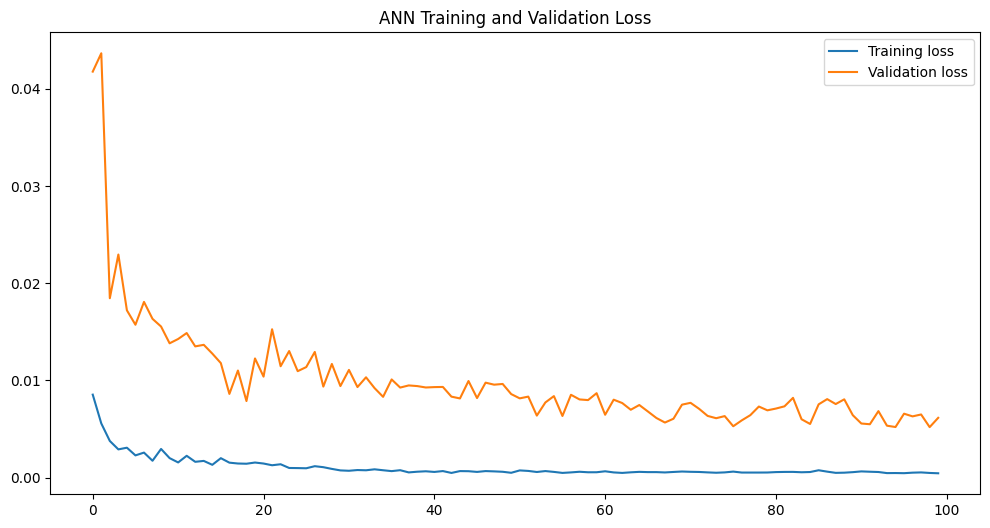

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming `study` is already defined from your Optuna optimization process
# Step 5: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Extract the best hyperparameters from the Optuna study
best_params = study.best_params

# Build the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=best_params['input_units'], input_dim=X_train_scaled_df.shape[1], activation=best_params['activation']))

# Adding hidden layers based on the number of layers suggested by Optuna
for i in range(best_params['num_layers']):
    # Dynamically get the number of units and dropout for each hidden layer
    num_units = best_params.get(f'n_units_{i}', 64)  # Default to 64 if not specified
    dropout_rate = best_params.get(f'dropout_rate_{i}', 0.3)  # Default to 0.3 if not specified

    model.add(Dense(units=num_units, activation=best_params['activation']))
    model.add(Dropout(rate=dropout_rate))

# Output layer (assuming a regression problem)
model.add(Dense(units=1))  # Single output for regression

# Optimizer (based on Optuna's suggestion)
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = Adam()
else:
    optimizer = Adam()  # You can add other optimizers here if needed

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(
    X_train_scaled_df, y_train_scaled,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.1,  # 10% of training data as validation
    verbose=1
)

# Print the final validation loss
final_loss, final_mae = model.evaluate(X_train_scaled_df, y_train_scaled, verbose=0)
print(f"Final Loss: {final_loss:.4f}")

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()


In [ ]:
test_predictions_scaled=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
len(test_predictions)

30

In [ ]:
# Inverse transform predictions and actual values
test_predictions = scaler_y.inverse_transform(test_predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, test_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, test_predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - test_predictions) / y_test_original)) * 100

# Print results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 90.2029
RMSE: 9.4975
MAE: 7.1185
MAPE: 137.53%


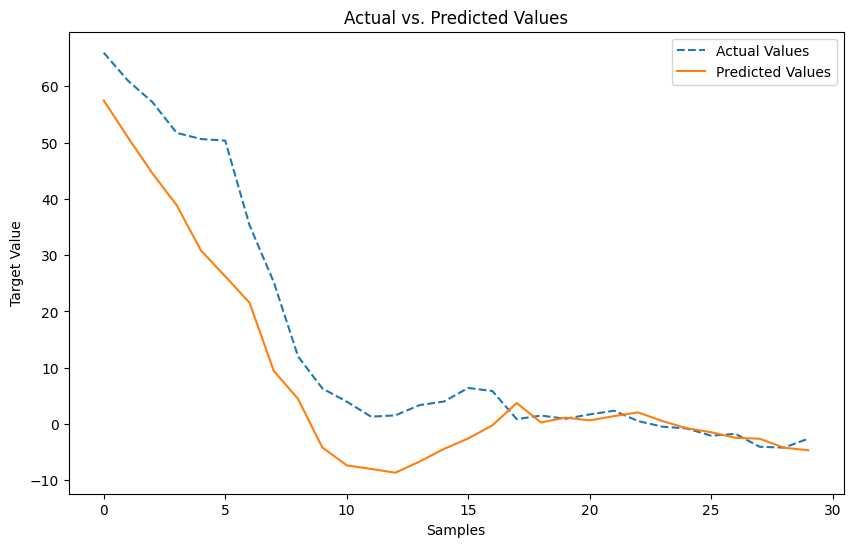

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Values", linestyle='dashed')
plt.plot(test_predictions, label="Predicted Values",  linestyle='solid')
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

## K